<a href="https://colab.research.google.com/github/seonghaiiiii/jeju-food/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import mean_squared_error, r2_score

#Data load


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data load
train = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/train.csv')
trade = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/international_trade.csv')
test = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/test.csv')

#train 기본 정보

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [ ]:
train.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


#데이터 자르기

In [ ]:
# ID 열의 앞 6자를 기준으로 groupby하여 데이터프레임을 분할
grouped = train.groupby(train['ID'].str[:6])

# 그룹별로 데이터프레임을 만들어 저장
dataframes = {}
for group_name, group_data in grouped:
    dataframes[group_name] = group_data

# 결과 확인
for group_name, group_df in dataframes.items():
    print(f"Group: {group_name}")
    print(group_df)


Group: BC_A_J
                    ID   timestamp item corporation location  supply(kg)  \
42644  BC_A_J_20190101  2019-01-01   BC           A        J         0.0   
42645  BC_A_J_20190102  2019-01-02   BC           A        J         0.0   
42646  BC_A_J_20190103  2019-01-03   BC           A        J      7616.0   
42647  BC_A_J_20190104  2019-01-04   BC           A        J      7488.0   
42648  BC_A_J_20190105  2019-01-05   BC           A        J     10408.0   
...                ...         ...  ...         ...      ...         ...   
44162  BC_A_J_20230227  2023-02-27   BC           A        J     11702.0   
44163  BC_A_J_20230228  2023-02-28   BC           A        J      6056.0   
44164  BC_A_J_20230301  2023-03-01   BC           A        J      5896.0   
44165  BC_A_J_20230302  2023-03-02   BC           A        J      8600.0   
44166  BC_A_J_20230303  2023-03-03   BC           A        J     10728.0   

       price(원/kg)  
42644          0.0  
42645          0.0  
42646     

In [ ]:
TG_A_J = dataframes.get('TG_A_J')
TG_A_S = dataframes.get('TG_A_S')
TG_B_J = dataframes.get('TG_B_J')
TG_B_S = dataframes.get('TG_B_S')
TG_C_J = dataframes.get('TG_C_J')
TG_C_S = dataframes.get('TG_C_S')
TG_D_J = dataframes.get('TG_D_J')
TG_D_S = dataframes.get('TG_D_S')
TG_E_J = dataframes.get('TG_E_J')
TG_E_S = dataframes.get('TG_E_S')

In [ ]:
CR_A_J = dataframes.get('CR_A_J')
CR_A_S = dataframes.get('CR_A_S')
CR_B_J = dataframes.get('CR_B_J')
CR_B_S = dataframes.get('CR_B_S')
CR_C_J = dataframes.get('CR_C_J')
CR_C_S = dataframes.get('CR_C_S')
CR_D_J = dataframes.get('CR_D_J')
CR_D_S = dataframes.get('CR_D_S')
CR_E_J = dataframes.get('CR_E_J')
CR_E_S = dataframes.get('CR_E_S')

In [ ]:
CB_A_J = dataframes.get('CB_A_J')
CB_A_S = dataframes.get('CB_A_S')
CB_B_J = dataframes.get('CB_B_J')
CB_B_S = dataframes.get('CB_B_S')
CB_C_J = dataframes.get('CB_C_J')
CB_C_S = dataframes.get('CB_C_S')
CB_D_J = dataframes.get('CB_D_J')
CB_D_S = dataframes.get('CB_D_S')
CB_E_J = dataframes.get('CB_E_J')
CB_E_S = dataframes.get('CB_E_S')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/sample_submission.csv')

In [ ]:
# 'ID' 열의 고유한 값 확인
unique_ids = df1['ID'].unique()

# 고유한 값들 출력
for unique_id in unique_ids:
    print(unique_id)

TG_A_J_20230304
TG_A_J_20230305
TG_A_J_20230306
TG_A_J_20230307
TG_A_J_20230308
TG_A_J_20230309
TG_A_J_20230310
TG_A_J_20230311
TG_A_J_20230312
TG_A_J_20230313
TG_A_J_20230314
TG_A_J_20230315
TG_A_J_20230316
TG_A_J_20230317
TG_A_J_20230318
TG_A_J_20230319
TG_A_J_20230320
TG_A_J_20230321
TG_A_J_20230322
TG_A_J_20230323
TG_A_J_20230324
TG_A_J_20230325
TG_A_J_20230326
TG_A_J_20230327
TG_A_J_20230328
TG_A_J_20230329
TG_A_J_20230330
TG_A_J_20230331
TG_A_S_20230304
TG_A_S_20230305
TG_A_S_20230306
TG_A_S_20230307
TG_A_S_20230308
TG_A_S_20230309
TG_A_S_20230310
TG_A_S_20230311
TG_A_S_20230312
TG_A_S_20230313
TG_A_S_20230314
TG_A_S_20230315
TG_A_S_20230316
TG_A_S_20230317
TG_A_S_20230318
TG_A_S_20230319
TG_A_S_20230320
TG_A_S_20230321
TG_A_S_20230322
TG_A_S_20230323
TG_A_S_20230324
TG_A_S_20230325
TG_A_S_20230326
TG_A_S_20230327
TG_A_S_20230328
TG_A_S_20230329
TG_A_S_20230330
TG_A_S_20230331
TG_B_J_20230304
TG_B_J_20230305
TG_B_J_20230306
TG_B_J_20230307
TG_B_J_20230308
TG_B_J_20230309
TG_B_J_2

In [ ]:
#ID 앞에 6자만 필요해서 자른거임
df1['ID_1'] = df1['ID'].str[:6]

In [ ]:
# 'ID' 열의 고유한 값 확인
unique_ids = df1['ID_1'].unique()

unique_ids

# 총 39개

array(['TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S',
       'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S', 'CR_A_J', 'CR_B_J',
       'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S', 'CB_A_J',
       'CB_A_S', 'CB_D_J', 'CB_E_J', 'RD_A_J', 'RD_A_S', 'RD_C_S',
       'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S', 'BC_A_J', 'BC_A_S',
       'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J',
       'BC_E_S', 'CB_F_J', 'RD_F_J'], dtype=object)

In [ ]:
TG_A_J = dataframes.get('TG_A_J')
TG_A_S = dataframes.get('TG_A_S')
TG_B_J = dataframes.get('TG_B_J')
TG_B_S = dataframes.get('TG_B_S')
TG_C_J = dataframes.get('TG_C_J')
TG_C_S = dataframes.get('TG_C_S')
TG_D_J = dataframes.get('TG_D_J')
TG_D_S = dataframes.get('TG_D_S')
TG_E_J = dataframes.get('TG_E_J')
TG_E_S = dataframes.get('TG_E_S')
CR_A_J = dataframes.get('CR_A_J')
CR_B_J = dataframes.get('CR_B_J')
CR_C_J = dataframes.get('CR_C_J')
CR_D_J = dataframes.get('CR_D_J')
CR_D_S = dataframes.get('CR_D_S')
CR_E_J = dataframes.get('CR_E_J')
CR_E_S = dataframes.get('CR_E_S')
CB_A_J = dataframes.get('CB_A_J')
CB_A_S = dataframes.get('CB_A_S')
CB_D_J = dataframes.get('CB_D_J')
CB_E_J = dataframes.get('CB_E_J')
RD_A_J = dataframes.get('RD_A_J')
RD_A_S = dataframes.get('RD_A_S')
RD_C_S = dataframes.get('RD_C_S')
RD_D_J = dataframes.get('RD_D_J')
RD_D_S = dataframes.get('RD_D_S')
RD_E_J = dataframes.get('RD_E_J')
RD_E_S = dataframes.get('RD_E_S')
BC_A_J = dataframes.get('BC_A_J')
BC_A_S = dataframes.get('BC_A_S')
BC_B_J = dataframes.get('BC_B_J')
BC_B_S = dataframes.get('BC_B_S')
BC_C_J = dataframes.get('BC_C_J')
BC_C_S = dataframes.get('BC_C_S')
BC_D_J = dataframes.get('BC_D_J')
BC_E_J = dataframes.get('BC_E_J')
BC_E_S = dataframes.get('BC_E_S')
CB_F_J = dataframes.get('CB_F_J')
RD_F_J = dataframes.get('RD_F_J')

In [ ]:
# 원하는 열 이름 목록을 만듭니다.
columns_to_extract = ['TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S',
                      'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S', 'CR_A_J', 'CR_B_J',
                      'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S', 'CB_A_J',
                      'CB_A_S', 'CB_D_J', 'CB_E_J', 'RD_A_J', 'RD_A_S', 'RD_C_S',
                      'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S', 'BC_A_J', 'BC_A_S',
                      'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J',
                      'BC_E_S', 'CB_F_J', 'RD_F_J']

# 열 이름 목록을 기반으로 데이터프레임에서 열을 반복적으로 추출합니다.
for column_name in columns_to_extract:
    extracted_column = dataframes.get(column_name)
    # 여기에서 extracted_column을 사용하여 원하는 작업을 수행할 수 있습니다.
    # 예를 들어, 추출된 열로 특정 계산을 수행하거나 다른 작업을 수행할 수 있습니다.


In [ ]:
# 삭제할 열 이름 리스트
columns_to_delete = ['ID', 'item', 'corporation', 'location','supply(kg)']
# 변수들에 대해 열 삭제 수행
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

for df in dataframes:
    df.drop(columns=columns_to_delete, inplace=True)


In [ ]:
# 변수들에 대해 열 이름 변경 수행
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

for df in dataframes:
    if 'price(원/kg)' in df.columns:
        df.rename(columns={'price(원/kg)': 'price'}, inplace=True)

In [ ]:
TG_A_J.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 0 to 1522
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1523 non-null   object 
 1   price      1523 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.7+ KB


In [ ]:
TG_A_J.head()

,timestamp,price
0,2019-01-01,0.0
1,2019-01-02,0.0
2,2019-01-03,1728.0
3,2019-01-04,1408.0
4,2019-01-05,1250.0


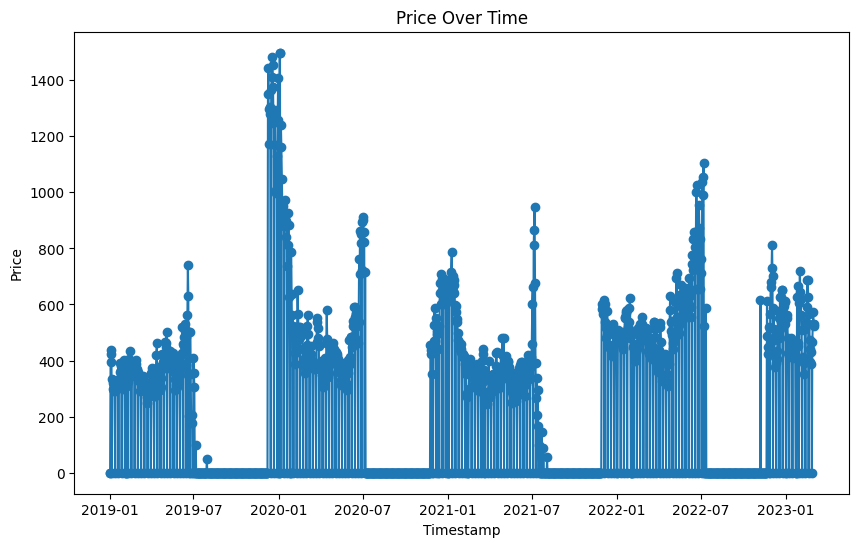

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성 혹은 이미 생성된 데이터프레임을 사용
# df = TG_A_J.info()  # 위의 데이터프레임을 사용할 경우 주석 해제
# timestamp 열을 날짜 및 시간 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['price'], marker='o', linestyle='-')

# 그래프에 제목과 레이블 추가
plt.title('Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price')

# x축의 날짜 형식 지정 (옵션)
plt.gca().xaxis_date()

# 그래프 표시
plt.show()


In [ ]:
TG_A_J.describe()

,price
count,1523.000000
mean,2568.509521
std,2911.200298
min,0.000000
25%,0.000000
50%,1439.000000
75%,4552.000000
max,11704.000000


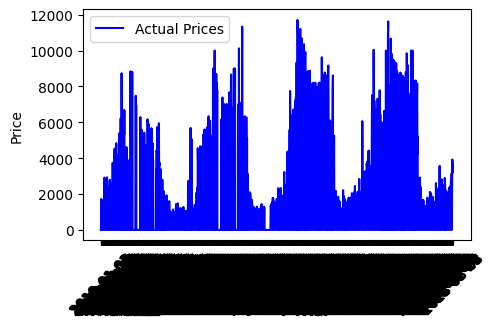

In [ ]:
import matplotlib.pyplot as plt

# Assuming TG_A_J is the dataframe for TG_A_J
# If not, replace TG_A_J with the appropriate dataframe variable

# Plotting the actual price values
plt.figure(figsize=(5, 3))
plt.plot(TG_A_J['timestamp'], TG_A_J['price'], label='Actual Prices', color='blue')

# Adding labels and title

plt.ylabel('Price')

plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()


이건 걍 그려본거야 준형아

#TG_A_J에 대해서만 걍 실험해본거

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime, timedelta

# Assuming TG_A_J is your DataFrame
# Convert timestamp to datetime and add a new column
TG_A_J['datetime'] = pd.to_datetime(TG_A_J['timestamp'])

# Extract relevant columns
data = TG_A_J[['datetime', 'price']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data[['price']] = scaler.fit_transform(data[['price']])

# Function to prepare the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set the look-back period (you can adjust this)
look_back = 1500

# Create the dataset
X, Y = create_dataset(data[['price']].values, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, Y, epochs=3, batch_size=1, verbose=2)

# Generate future timestamps from 2023-03-04 to 2023-03-31
future_dates = pd.date_range(start='2023-03-04', end='2023-03-31')

# Make predictions for the future dates
predicted_prices_normalized = []

for i in range(len(future_dates)):
    input_data = data['price'][-look_back:].values.reshape(1, 1, look_back)
    predicted_price_normalized = model.predict(input_data)[0, 0]
    predicted_prices_normalized.append(predicted_price_normalized)
    data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)

# Inverse transform the predicted prices to get the actual values
predicted_prices = scaler.inverse_transform(np.array(predicted_prices_normalized).reshape(-1, 1))

# Create a DataFrame for the predicted prices and corresponding timestamps
predicted_df = pd.DataFrame(index=future_dates, data={'predicted_price': predicted_prices.flatten()})

# Rename the first column in predicted_df to 'timestamp'
predicted_df = predicted_df.rename(columns={'predicted_price': 'price'})

# Add the 'timestamp' column to predicted_df
predicted_df['timestamp'] = predicted_df.index

# Display the updated predicted_df
print(predicted_df.head())


<ipython-input-22-dac008ea0a96>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0331 - 2s/epoch - 94ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0123 - 129ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0037 - 114ms/epoch - 5ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


1/1 [==============================] - 0s 21ms/step


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


1/1 [==============================] - 0s 24ms/step


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
                  price  timestamp
2023-03-04  2264.183350 2023-03-04
2023-03-05  1373.335693 2023-03-05
2023-03-06  2346.740479 2023-03-06
2023-03-07  2644.558350 2023-03-07
2023-03-08  2511.582275 2023-03-08


<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-22-dac008ea0a96>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[i], 'price': predicted_price_normalized}, ignore_index=True)


In [ ]:
predicted_df

,price,timestamp
2023-03-04,2264.183350,2023-03-04
2023-03-05,1373.335693,2023-03-05
2023-03-06,2346.740479,2023-03-06
2023-03-07,2644.558350,2023-03-07
2023-03-08,2511.582275,2023-03-08
2023-03-09,2755.811523,2023-03-09
2023-03-10,2483.652344,2023-03-10
2023-03-11,2098.250488,2023-03-11
2023-03-12,1821.452759,2023-03-12
2023-03-13,2353.904053,2023-03-13


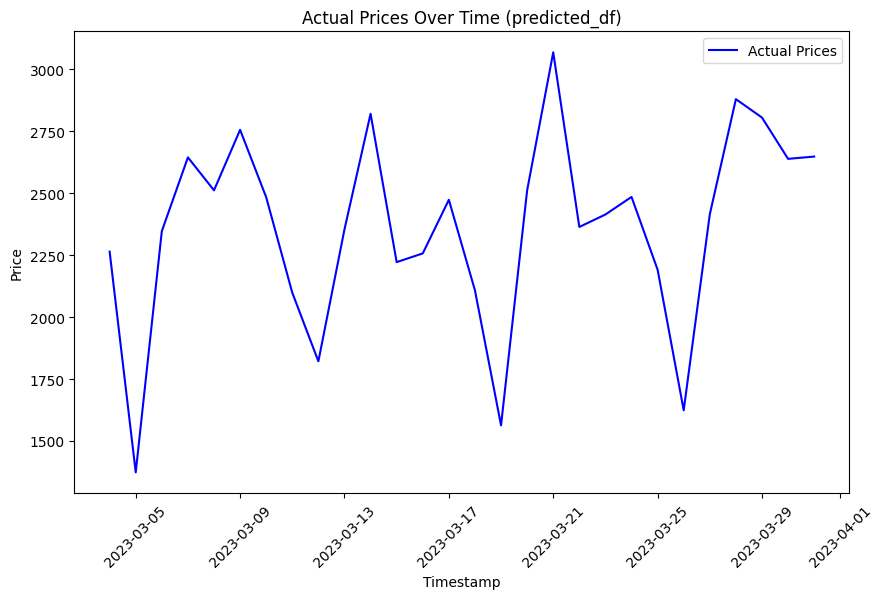

In [ ]:
import matplotlib.pyplot as plt

# Assuming predicted_df is the dataframe for predicted_df
# If not, replace predicted_df with the appropriate dataframe variable

# Plotting the actual price values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df['timestamp'], predicted_df['price'], label='Actual Prices', color='blue')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Actual Prices Over Time (predicted_df)')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()

#이게 아마 최종본일듯..아니 제발
아니다 이건 조기종료 없는거
밑에꺼 봐

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime, timedelta

# List of dataframes
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

# Initialize a dictionary to store predicted DataFrames
predicted_dfs = {}

# Loop through each dataframe
for i, df in enumerate(dataframes):
    # Convert timestamp to datetime and add a new column
    df['datetime'] = pd.to_datetime(df['timestamp'])

    # Extract relevant columns
    data = df[['datetime', 'price']]

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[['price']] = scaler.fit_transform(data[['price']])

    # Set the look-back period (you can adjust this)
    look_back = 1500

    # Create the dataset
    X, Y = create_dataset(data[['price']].values, look_back)

    # Reshape input to be [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(X, Y, epochs=3, batch_size=1, verbose=2)

    # Generate future timestamps from 2023-03-04 to 2023-03-31
    future_dates = pd.date_range(start='2023-03-04', end='2023-03-31')

    # Make predictions for the future dates
    predicted_prices_normalized = []

    for j in range(len(future_dates)):
        input_data = data['price'][-look_back:].values.reshape(1, 1, look_back)
        predicted_price_normalized = model.predict(input_data)[0, 0]
        predicted_prices_normalized.append(predicted_price_normalized)
        data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)

    # Inverse transform the predicted prices to get the actual values
    predicted_prices = scaler.inverse_transform(np.array(predicted_prices_normalized).reshape(-1, 1))

    # Create a DataFrame for the predicted prices and corresponding timestamps
    predicted_df = pd.DataFrame(index=future_dates, data={'predicted_price': predicted_prices.flatten()})

    # Rename the first column in predicted_df to 'timestamp'
    predicted_df = predicted_df.rename(columns={'predicted_price': 'price'})

    # Add the 'timestamp' column to predicted_df
    predicted_df['timestamp'] = predicted_df.index

    # Store the result in the dictionary
    predicted_dfs[f'predicted_df{i+1}'] = predicted_df

# Display the first few rows of the first predicted dataframe
print(predicted_dfs['predicted_df1'].head())


<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0464 - 2s/epoch - 107ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0096 - 132ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0030 - 121ms/epoch - 5ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Epoch 1/3
23/23 - 2s - loss: 0.0942 - 2s/epoch - 81ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0163 - 125ms/epoch - 5ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0071 - 117ms/epoch - 5ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


1/1 [==============================] - 0s 25ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Epoch 1/3
23/23 - 2s - loss: 0.0699 - 2s/epoch - 99ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0129 - 198ms/epoch - 9ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0083 - 211ms/epoch - 9ms/step
1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0541 - 2s/epoch - 100ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0165 - 127ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0058 - 133ms/epoch - 6ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0293 - 2s/epoch - 81ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0138 - 123ms/epoch - 5ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0072 - 135ms/epoch - 6ms/step
1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0905 - 2s/epoch - 97ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0091 - 118ms/epoch - 5ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0064 - 128ms/epoch - 6ms/step
1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0463 - 2s/epoch - 83ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0205 - 130ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0124 - 134ms/epoch - 6ms/step
1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.0439 - 3s/epoch - 112ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0155 - 207ms/epoch - 9ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0031 - 201ms/epoch - 9ms/step
1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0361 - 2s/epoch - 83ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0098 - 131ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0051 - 119ms/epoch - 5ms/step
1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0512 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0097 - 125ms/epoch - 5ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0053 - 121ms/epoch - 5ms/step
1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.1275 - 2s/epoch - 92ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0334 - 135ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0108 - 148ms/epoch - 6ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.1183 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0623 - 126ms/epoch - 5ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0246 - 135ms/epoch - 6ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.1222 - 3s/epoch - 119ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0573 - 211ms/epoch - 9ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0160 - 182ms/epoch - 8ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.1008 - 3s/epoch - 114ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0211 - 139ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0123 - 129ms/epoch - 6ms/step
1/1 [==============================] - 0s 87ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 2.0987e-04 - 2s/epoch - 104ms/step
Epoch 2/3
23/23 - 0s - loss: 2.5600e-04 - 213ms/epoch - 9ms/step
Epoch 3/3
23/23 - 0s - loss: 1.2135e-04 - 214ms/epoch - 9ms/step
1/1 [==============================] - 0s 36ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Epoch 1/3
23/23 - 2s - loss: 0.2348 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0630 - 129ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0146 - 128ms/epoch - 6ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 7.0258e-04 - 2s/epoch - 83ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0044 - 141ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0014 - 128ms/epoch - 6ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.1759 - 2s/epoch - 104ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0443 - 144ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0204 - 135ms/epoch - 6ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 125ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 119ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0855 - 2s/epoch - 83ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0520 - 144ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0341 - 134ms/epoch - 6ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.1105 - 3s/epoch - 127ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0477 - 185ms/epoch - 8ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0133 - 142ms/epoch - 6ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0219 - 2s/epoch - 81ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0162 - 141ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0065 - 131ms/epoch - 6ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0114 - 2s/epoch - 91ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0065 - 195ms/epoch - 8ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0024 - 195ms/epoch - 8ms/step
1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Epoch 1/3
23/23 - 2s - loss: 0.0510 - 2s/epoch - 84ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0197 - 138ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0051 - 133ms/epoch - 6ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0111 - 2s/epoch - 84ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0058 - 141ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0028 - 154ms/epoch - 7ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.0410 - 3s/epoch - 120ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0158 - 221ms/epoch - 10ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0070 - 220ms/epoch - 10ms/step
1/1 [==============================] - 1s 1s/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 103ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 146ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 124ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 150ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 101ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 108ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 115ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 8s - loss: 0.0259 - 8s/epoch - 358ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0157 - 208ms/epoch - 9ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0054 - 140ms/epoch - 6ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0968 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0265 - 135ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0141 - 136ms/epoch - 6ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0580 - 2s/epoch - 107ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0233 - 142ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0074 - 133ms/epoch - 6ms/step
1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0838 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0290 - 138ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0085 - 122ms/epoch - 5ms/step
1/1 [==============================] - 0s 27ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.1068 - 3s/epoch - 110ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0146 - 211ms/epoch - 9ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0168 - 210ms/epoch - 9ms/step
1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0600 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0139 - 138ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0027 - 124ms/epoch - 5ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0216 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0131 - 134ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0047 - 129ms/epoch - 6ms/step
1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0707 - 2s/epoch - 93ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0132 - 128ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0039 - 129ms/epoch - 6ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.0127 - 3s/epoch - 134ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0075 - 135ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0025 - 144ms/epoch - 6ms/step
1/1 [==============================] - 0s 25ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 3s - loss: 0.0320 - 3s/epoch - 114ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0130 - 135ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0067 - 141ms/epoch - 6ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0291 - 2s/epoch - 83ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0053 - 124ms/epoch - 5ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0028 - 124ms/epoch - 5ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0468 - 2s/epoch - 105ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0149 - 206ms/epoch - 9ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0052 - 196ms/epoch - 9ms/step
1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Epoch 1/3
23/23 - 2s - loss: 0.0269 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0085 - 127ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0036 - 129ms/epoch - 6ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/3
23/23 - 2s - loss: 0.0900 - 2s/epoch - 82ms/step
Epoch 2/3
23/23 - 0s - loss: 0.0200 - 135ms/epoch - 6ms/step
Epoch 3/3
23/23 - 0s - loss: 0.0170 - 135ms/epoch - 6ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step
                  price  timestamp
2023-03-04  2555.162354 2023-03-04
2023-03-05  1684.399292 2023-03-05
2023-03-06  2335.546387 2023-03-06
2023-03-07  3010.831055 2023-03-07
2023-03-08  2575.638184 2023-03-08


<ipython-input-25-62d552f978dc>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


In [ ]:
predicted_dfs['predicted_df4']

,price,timestamp
2023-03-04,3875.977051,2023-03-04
2023-03-05,1839.912720,2023-03-05
2023-03-06,3731.645020,2023-03-06
2023-03-07,3694.650635,2023-03-07
2023-03-08,3901.126953,2023-03-08
2023-03-09,3717.627441,2023-03-09
2023-03-10,3709.184326,2023-03-10
2023-03-11,3905.713379,2023-03-11
2023-03-12,2003.542847,2023-03-12
2023-03-13,3620.656006,2023-03-13


In [ ]:
predicted_dfs['predicted_df19']

,price,timestamp
2023-03-04,315.805359,2023-03-04
2023-03-05,250.636276,2023-03-05
2023-03-06,218.621017,2023-03-06
2023-03-07,160.079620,2023-03-07
2023-03-08,29.415756,2023-03-08
2023-03-09,2.432702,2023-03-09
2023-03-10,11.421209,2023-03-10
2023-03-11,-15.310060,2023-03-11
2023-03-12,-14.460427,2023-03-12
2023-03-13,39.422520,2023-03-13


#아마 이게 최종? price lstm 예측

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Function to prepare the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# List of dataframes
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

# Initialize a dictionary to store predicted DataFrames
predicted_dfs = {}

# Loop through each dataframe
for i, df in enumerate(dataframes):
    # Convert timestamp to datetime and add a new column
    df['datetime'] = pd.to_datetime(df['timestamp'])

    # Extract relevant columns
    data = df[['datetime', 'price']]

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[['price']] = scaler.fit_transform(data[['price']])

    # Set the look-back period (you can adjust this)
    look_back = 1500

    # Create the dataset
    X, Y = create_dataset(data[['price']].values, look_back)

    # Reshape input to be [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    # Build the LSTM model with early stopping
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit the model with early stopping
    model.fit(X, Y, epochs=50, batch_size=64, verbose=2, callbacks=[early_stopping])

    # Generate future timestamps from 2023-03-04 to 2023-03-31
    future_dates = pd.date_range(start='2023-03-04', end='2023-03-31')

    # Make predictions for the future dates
    predicted_prices_normalized = []

    for j in range(len(future_dates)):
        input_data = data['price'][-look_back:].values.reshape(1, 1, look_back)
        predicted_price_normalized = model.predict(input_data)[0, 0]
        predicted_prices_normalized.append(predicted_price_normalized)
        data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)

    # Inverse transform the predicted prices to get the actual values
    predicted_prices = scaler.inverse_transform(np.array(predicted_prices_normalized).reshape(-1, 1))

    # Create a DataFrame for the predicted prices and corresponding timestamps
    predicted_df = pd.DataFrame(index=future_dates, data={'predicted_price': predicted_prices.flatten()})

    # Rename the first column in predicted_df to 'timestamp'
    predicted_df = predicted_df.rename(columns={'predicted_price': 'price'})

    # Add the 'timestamp' column to predicted_df
    predicted_df['timestamp'] = predicted_df.index

    # Store the result in the dictionary
    predicted_dfs[f'predicted_df{i+1}'] = predicted_df

# Display the first few rows of the first predicted dataframe
print(predicted_dfs['predicted_df1'].head())


<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 2s - loss: 0.0437 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.2709 - 13ms/epoch - 13ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0444 - 15ms/epoch - 15ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0193 - 16ms/epoch - 16ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0613 - 14ms/epoch - 14ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0686 - 15ms/epoch - 15ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0512 - 14ms/epoch - 14ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0310 - 19ms/epoch - 19ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0163 - 18ms/epoch - 18ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0081 - 15ms/epoch - 15ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0047 - 16ms/epoch - 16ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0044 - 14ms/epoch - 14ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0057 - 17ms/epoch - 17ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0073 - 15ms/epoch - 15ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0086 - 13ms/epoch - 13ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0089 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0084 - 15ms/epoch - 15ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0073 - 20ms/epoch - 20ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0060 - 16ms/epoch - 16ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0049 - 16ms/epoch - 16ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0040 - 17ms/epoch - 17ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0036 - 15ms/epoch - 15ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0035 - 16ms/epoch - 16ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0036 - 20ms/epoch - 20ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0038 - 16ms/epoch - 16ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0040 - 17ms/epoch - 17ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0041 - 17ms/epoch - 17ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0041 - 15ms/epoch - 15ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0040 - 16ms/epoch - 16ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0038 - 17ms/epoch - 17ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0035 - 16ms/epoch - 16ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0031 - 15ms/epoch - 15ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0027 - 17ms/epoch - 17ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0024 - 21ms/epoch - 21ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0021 - 13ms/epoch - 13ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0019 - 16ms/epoch - 16ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0018 - 17ms/epoch - 17ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0018 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0018 - 22ms/epoch - 22ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0018 - 16ms/epoch - 16ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0018 - 17ms/epoch - 17ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0017 - 15ms/epoch - 15ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0016 - 17ms/epoch - 17ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0015 - 15ms/epoch - 15ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0013 - 17ms/epoch - 17ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0011 - 20ms/epoch - 20ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0010 - 13ms/epoch - 13ms/step
Epoch 48/50


1/1 - 0s - loss: 9.2957e-04 - 17ms/epoch - 17ms/step
Epoch 49/50


1/1 - 0s - loss: 8.8548e-04 - 16ms/epoch - 16ms/step
Epoch 50/50


1/1 - 0s - loss: 8.6416e-04 - 20ms/epoch - 20ms/step
1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.1877 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.3186 - 26ms/epoch - 26ms/step
Epoch 3/50


1/1 - 0s - loss: 0.1488 - 24ms/epoch - 24ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0209 - 29ms/epoch - 29ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0206 - 24ms/epoch - 24ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0524 - 26ms/epoch - 26ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0653 - 21ms/epoch - 21ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0578 - 19ms/epoch - 19ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0422 - 24ms/epoch - 24ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0274 - 22ms/epoch - 22ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0168 - 19ms/epoch - 19ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0109 - 24ms/epoch - 24ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0087 - 22ms/epoch - 22ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0092 - 20ms/epoch - 20ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0109 - 21ms/epoch - 21ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0128 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0142 - 18ms/epoch - 18ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0145 - 22ms/epoch - 22ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0138 - 21ms/epoch - 21ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0124 - 23ms/epoch - 23ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0107 - 18ms/epoch - 18ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0092 - 28ms/epoch - 28ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0081 - 24ms/epoch - 24ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0074 - 18ms/epoch - 18ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0071 - 28ms/epoch - 28ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0071 - 21ms/epoch - 21ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0074 - 22ms/epoch - 22ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0076 - 31ms/epoch - 31ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0078 - 26ms/epoch - 26ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0079 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0079 - 19ms/epoch - 19ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0076 - 22ms/epoch - 22ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0073 - 23ms/epoch - 23ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0068 - 19ms/epoch - 19ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0063 - 19ms/epoch - 19ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0059 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0055 - 24ms/epoch - 24ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0052 - 27ms/epoch - 27ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0050 - 21ms/epoch - 21ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0049 - 21ms/epoch - 21ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0048 - 20ms/epoch - 20ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0047 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0046 - 22ms/epoch - 22ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0045 - 20ms/epoch - 20ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0043 - 21ms/epoch - 21ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0040 - 17ms/epoch - 17ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0038 - 21ms/epoch - 21ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0035 - 16ms/epoch - 16ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0033 - 17ms/epoch - 17ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0032 - 22ms/epoch - 22ms/step
1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0736 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.4297 - 19ms/epoch - 19ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0855 - 18ms/epoch - 18ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0296 - 16ms/epoch - 16ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0912 - 21ms/epoch - 21ms/step
Epoch 6/50


1/1 - 0s - loss: 0.1095 - 21ms/epoch - 21ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0900 - 25ms/epoch - 25ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0632 - 22ms/epoch - 22ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0419 - 18ms/epoch - 18ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0281 - 28ms/epoch - 28ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0202 - 22ms/epoch - 22ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0164 - 19ms/epoch - 19ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0152 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0154 - 18ms/epoch - 18ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0164 - 18ms/epoch - 18ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0173 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0179 - 19ms/epoch - 19ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0180 - 18ms/epoch - 18ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0176 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0168 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0158 - 21ms/epoch - 21ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0147 - 19ms/epoch - 19ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0139 - 20ms/epoch - 20ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0132 - 18ms/epoch - 18ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0127 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0125 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0124 - 18ms/epoch - 18ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0124 - 18ms/epoch - 18ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0123 - 20ms/epoch - 20ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0123 - 21ms/epoch - 21ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0121 - 19ms/epoch - 19ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0119 - 20ms/epoch - 20ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0116 - 18ms/epoch - 18ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0112 - 21ms/epoch - 21ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0107 - 19ms/epoch - 19ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0103 - 19ms/epoch - 19ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0099 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0095 - 19ms/epoch - 19ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0092 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0089 - 18ms/epoch - 18ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0087 - 19ms/epoch - 19ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0085 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0084 - 20ms/epoch - 20ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0082 - 18ms/epoch - 18ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0080 - 19ms/epoch - 19ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0078 - 18ms/epoch - 18ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0075 - 19ms/epoch - 19ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0072 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0069 - 18ms/epoch - 18ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0067 - 17ms/epoch - 17ms/step
1/1 [==============================] - 0s 28ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 2s - loss: 0.0520 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.4193 - 20ms/epoch - 20ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0667 - 17ms/epoch - 17ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0236 - 20ms/epoch - 20ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0890 - 18ms/epoch - 18ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0991 - 22ms/epoch - 22ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0725 - 18ms/epoch - 18ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0432 - 17ms/epoch - 17ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0231 - 19ms/epoch - 19ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0124 - 17ms/epoch - 17ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0086 - 17ms/epoch - 17ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0089 - 17ms/epoch - 17ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0110 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0132 - 18ms/epoch - 18ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0145 - 18ms/epoch - 18ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0143 - 17ms/epoch - 17ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0130 - 18ms/epoch - 18ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0111 - 23ms/epoch - 23ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0093 - 17ms/epoch - 17ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0079 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0071 - 18ms/epoch - 18ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0070 - 18ms/epoch - 18ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0072 - 20ms/epoch - 20ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0076 - 18ms/epoch - 18ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0081 - 21ms/epoch - 21ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0083 - 23ms/epoch - 23ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0083 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0081 - 18ms/epoch - 18ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0076 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0070 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0064 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0058 - 22ms/epoch - 22ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0054 - 18ms/epoch - 18ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0051 - 18ms/epoch - 18ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0050 - 17ms/epoch - 17ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0051 - 17ms/epoch - 17ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0051 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0052 - 18ms/epoch - 18ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0052 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0050 - 23ms/epoch - 23ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0048 - 18ms/epoch - 18ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0045 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0042 - 18ms/epoch - 18ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0040 - 17ms/epoch - 17ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0038 - 18ms/epoch - 18ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0037 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0037 - 18ms/epoch - 18ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0036 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0036 - 21ms/epoch - 21ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0035 - 17ms/epoch - 17ms/step
1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0414 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.2396 - 23ms/epoch - 23ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0396 - 21ms/epoch - 21ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0225 - 22ms/epoch - 22ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0647 - 24ms/epoch - 24ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0723 - 25ms/epoch - 25ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0552 - 29ms/epoch - 29ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0347 - 33ms/epoch - 33ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0198 - 33ms/epoch - 33ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0115 - 19ms/epoch - 19ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0084 - 22ms/epoch - 22ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0084 - 23ms/epoch - 23ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0099 - 25ms/epoch - 25ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0115 - 24ms/epoch - 24ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0123 - 25ms/epoch - 25ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0120 - 25ms/epoch - 25ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0109 - 22ms/epoch - 22ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0096 - 20ms/epoch - 20ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0083 - 23ms/epoch - 23ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0074 - 20ms/epoch - 20ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0069 - 20ms/epoch - 20ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0068 - 22ms/epoch - 22ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0070 - 22ms/epoch - 22ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0072 - 19ms/epoch - 19ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0074 - 28ms/epoch - 28ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0076 - 20ms/epoch - 20ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0076 - 23ms/epoch - 23ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0075 - 27ms/epoch - 27ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0072 - 27ms/epoch - 27ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0069 - 31ms/epoch - 31ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0065 - 27ms/epoch - 27ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0060 - 24ms/epoch - 24ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0056 - 20ms/epoch - 20ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0053 - 20ms/epoch - 20ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0050 - 20ms/epoch - 20ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0049 - 23ms/epoch - 23ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0049 - 21ms/epoch - 21ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0049 - 24ms/epoch - 24ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0049 - 22ms/epoch - 22ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0048 - 25ms/epoch - 25ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0047 - 21ms/epoch - 21ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0045 - 19ms/epoch - 19ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0043 - 25ms/epoch - 25ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0041 - 25ms/epoch - 25ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0039 - 24ms/epoch - 24ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0037 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0036 - 22ms/epoch - 22ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0035 - 20ms/epoch - 20ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0035 - 20ms/epoch - 20ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0034 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Epoch 1/50


1/1 - 2s - loss: 0.0883 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.5747 - 27ms/epoch - 27ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0965 - 17ms/epoch - 17ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0240 - 23ms/epoch - 23ms/step
Epoch 5/50


1/1 - 0s - loss: 0.1107 - 24ms/epoch - 24ms/step
Epoch 6/50


1/1 - 0s - loss: 0.1335 - 24ms/epoch - 24ms/step
Epoch 7/50


1/1 - 0s - loss: 0.1060 - 26ms/epoch - 26ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0703 - 22ms/epoch - 22ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0430 - 23ms/epoch - 23ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0256 - 18ms/epoch - 18ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0156 - 18ms/epoch - 18ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0104 - 19ms/epoch - 19ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0083 - 20ms/epoch - 20ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0081 - 21ms/epoch - 21ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0089 - 24ms/epoch - 24ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0100 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0110 - 20ms/epoch - 20ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0116 - 18ms/epoch - 18ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0116 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0111 - 24ms/epoch - 24ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0103 - 24ms/epoch - 24ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0094 - 20ms/epoch - 20ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0085 - 23ms/epoch - 23ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0078 - 21ms/epoch - 21ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0073 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0071 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0070 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0071 - 20ms/epoch - 20ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0072 - 22ms/epoch - 22ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0073 - 18ms/epoch - 18ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0074 - 20ms/epoch - 20ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0073 - 21ms/epoch - 21ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0071 - 26ms/epoch - 26ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0069 - 20ms/epoch - 20ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0065 - 26ms/epoch - 26ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0062 - 27ms/epoch - 27ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0059 - 23ms/epoch - 23ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0056 - 17ms/epoch - 17ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0054 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0052 - 17ms/epoch - 17ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0051 - 23ms/epoch - 23ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0050 - 17ms/epoch - 17ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0050 - 17ms/epoch - 17ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0049 - 17ms/epoch - 17ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0048 - 17ms/epoch - 17ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0047 - 17ms/epoch - 17ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0045 - 17ms/epoch - 17ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0044 - 17ms/epoch - 17ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0042 - 17ms/epoch - 17ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0040 - 16ms/epoch - 16ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0321 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0208 - 26ms/epoch - 26ms/step
Epoch 3/50


1/1 - 0s - loss: 0.1095 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0096 - 19ms/epoch - 19ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0285 - 25ms/epoch - 25ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0435 - 30ms/epoch - 30ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0214 - 19ms/epoch - 19ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0058 - 22ms/epoch - 22ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0059 - 19ms/epoch - 19ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0124 - 20ms/epoch - 20ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0168 - 19ms/epoch - 19ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0167 - 19ms/epoch - 19ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0135 - 32ms/epoch - 32ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0097 - 22ms/epoch - 22ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0069 - 25ms/epoch - 25ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0056 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0056 - 21ms/epoch - 21ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0065 - 26ms/epoch - 26ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0074 - 21ms/epoch - 21ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0079 - 23ms/epoch - 23ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0077 - 26ms/epoch - 26ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0069 - 29ms/epoch - 29ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0057 - 32ms/epoch - 32ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0045 - 22ms/epoch - 22ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0035 - 21ms/epoch - 21ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0028 - 23ms/epoch - 23ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0025 - 17ms/epoch - 17ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0024 - 19ms/epoch - 19ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0024 - 17ms/epoch - 17ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0023 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0021 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0018 - 22ms/epoch - 22ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0014 - 26ms/epoch - 26ms/step
Epoch 34/50


1/1 - 0s - loss: 9.7212e-04 - 16ms/epoch - 16ms/step
Epoch 35/50


1/1 - 0s - loss: 7.0690e-04 - 15ms/epoch - 15ms/step
Epoch 36/50


1/1 - 0s - loss: 6.6169e-04 - 16ms/epoch - 16ms/step
Epoch 37/50


1/1 - 0s - loss: 8.1248e-04 - 21ms/epoch - 21ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0010 - 23ms/epoch - 23ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0012 - 23ms/epoch - 23ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0012 - 21ms/epoch - 21ms/step
Epoch 41/50


1/1 - 0s - loss: 9.7820e-04 - 34ms/epoch - 34ms/step
Epoch 42/50


1/1 - 0s - loss: 7.6401e-04 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 6.1759e-04 - 20ms/epoch - 20ms/step
Epoch 44/50


1/1 - 0s - loss: 5.7609e-04 - 18ms/epoch - 18ms/step
Epoch 45/50


1/1 - 0s - loss: 6.0005e-04 - 23ms/epoch - 23ms/step
Epoch 46/50


1/1 - 0s - loss: 6.1723e-04 - 22ms/epoch - 22ms/step
Epoch 47/50


1/1 - 0s - loss: 5.7599e-04 - 22ms/epoch - 22ms/step
Epoch 48/50


1/1 - 0s - loss: 4.7302e-04 - 20ms/epoch - 20ms/step
Epoch 49/50


1/1 - 0s - loss: 3.4551e-04 - 21ms/epoch - 21ms/step
Epoch 50/50


1/1 - 0s - loss: 2.4183e-04 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0211 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.9327 - 21ms/epoch - 21ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0901 - 17ms/epoch - 17ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0921 - 28ms/epoch - 28ms/step
Epoch 5/50


1/1 - 0s - loss: 0.2592 - 30ms/epoch - 30ms/step
Epoch 6/50


1/1 - 0s - loss: 0.2324 - 19ms/epoch - 19ms/step
Epoch 7/50


1/1 - 0s - loss: 0.1408 - 18ms/epoch - 18ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0673 - 17ms/epoch - 17ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0266 - 17ms/epoch - 17ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0101 - 22ms/epoch - 22ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0070 - 22ms/epoch - 22ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0100 - 18ms/epoch - 18ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0144 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0178 - 18ms/epoch - 18ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0193 - 23ms/epoch - 23ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0187 - 25ms/epoch - 25ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0167 - 23ms/epoch - 23ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0140 - 22ms/epoch - 22ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0114 - 22ms/epoch - 22ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0092 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0078 - 20ms/epoch - 20ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0071 - 19ms/epoch - 19ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0070 - 19ms/epoch - 19ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0072 - 19ms/epoch - 19ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0076 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0081 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0086 - 24ms/epoch - 24ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0089 - 22ms/epoch - 22ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0091 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0091 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0089 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0086 - 23ms/epoch - 23ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0082 - 17ms/epoch - 17ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0077 - 19ms/epoch - 19ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0071 - 18ms/epoch - 18ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0066 - 19ms/epoch - 19ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0060 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0056 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0053 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0051 - 19ms/epoch - 19ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0050 - 27ms/epoch - 27ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0049 - 24ms/epoch - 24ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0050 - 24ms/epoch - 24ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0050 - 22ms/epoch - 22ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0051 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0050 - 23ms/epoch - 23ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0050 - 21ms/epoch - 21ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0048 - 17ms/epoch - 17ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0046 - 17ms/epoch - 17ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0044 - 16ms/epoch - 16ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 2s - loss: 0.0288 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.2872 - 24ms/epoch - 24ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0353 - 29ms/epoch - 29ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0309 - 20ms/epoch - 20ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0833 - 20ms/epoch - 20ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0819 - 22ms/epoch - 22ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0547 - 19ms/epoch - 19ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0297 - 20ms/epoch - 20ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0147 - 17ms/epoch - 17ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0084 - 18ms/epoch - 18ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0073 - 17ms/epoch - 17ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0088 - 18ms/epoch - 18ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0110 - 18ms/epoch - 18ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0127 - 17ms/epoch - 17ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0134 - 17ms/epoch - 17ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0131 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0121 - 18ms/epoch - 18ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0107 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0094 - 18ms/epoch - 18ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0083 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0074 - 21ms/epoch - 21ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0069 - 18ms/epoch - 18ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0066 - 23ms/epoch - 23ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0065 - 20ms/epoch - 20ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0065 - 18ms/epoch - 18ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0065 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0065 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0065 - 18ms/epoch - 18ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0063 - 18ms/epoch - 18ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0061 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0058 - 19ms/epoch - 19ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0055 - 18ms/epoch - 18ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0051 - 18ms/epoch - 18ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0046 - 19ms/epoch - 19ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0042 - 18ms/epoch - 18ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0037 - 18ms/epoch - 18ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0033 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0030 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0027 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0026 - 18ms/epoch - 18ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0024 - 18ms/epoch - 18ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0023 - 22ms/epoch - 22ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0023 - 22ms/epoch - 22ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0022 - 26ms/epoch - 26ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0020 - 28ms/epoch - 28ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0019 - 25ms/epoch - 25ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0017 - 27ms/epoch - 27ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0015 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0013 - 19ms/epoch - 19ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0011 - 24ms/epoch - 24ms/step
1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.2441 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0866 - 38ms/epoch - 38ms/step
Epoch 3/50


1/1 - 0s - loss: 0.1156 - 21ms/epoch - 21ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0464 - 19ms/epoch - 19ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0116 - 18ms/epoch - 18ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0094 - 18ms/epoch - 18ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0174 - 20ms/epoch - 20ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0249 - 19ms/epoch - 19ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0289 - 21ms/epoch - 21ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0298 - 21ms/epoch - 21ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0283 - 20ms/epoch - 20ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0255 - 21ms/epoch - 21ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0218 - 20ms/epoch - 20ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0179 - 19ms/epoch - 19ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0140 - 20ms/epoch - 20ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0105 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0077 - 21ms/epoch - 21ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0059 - 20ms/epoch - 20ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0053 - 22ms/epoch - 22ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0057 - 20ms/epoch - 20ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0069 - 20ms/epoch - 20ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0081 - 24ms/epoch - 24ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0088 - 26ms/epoch - 26ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0089 - 25ms/epoch - 25ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0082 - 27ms/epoch - 27ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0071 - 21ms/epoch - 21ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0059 - 20ms/epoch - 20ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0048 - 23ms/epoch - 23ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0042 - 22ms/epoch - 22ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0039 - 18ms/epoch - 18ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0040 - 22ms/epoch - 22ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0042 - 25ms/epoch - 25ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0045 - 21ms/epoch - 21ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0047 - 20ms/epoch - 20ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0047 - 21ms/epoch - 21ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0045 - 21ms/epoch - 21ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0042 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0039 - 19ms/epoch - 19ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0034 - 23ms/epoch - 23ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0031 - 22ms/epoch - 22ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0028 - 19ms/epoch - 19ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0027 - 19ms/epoch - 19ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0027 - 20ms/epoch - 20ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0027 - 19ms/epoch - 19ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0028 - 19ms/epoch - 19ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0028 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0027 - 20ms/epoch - 20ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0025 - 20ms/epoch - 20ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0024 - 19ms/epoch - 19ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0022 - 20ms/epoch - 20ms/step
1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 2s - loss: 0.1544 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.1537 - 27ms/epoch - 27ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0941 - 24ms/epoch - 24ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0393 - 21ms/epoch - 21ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0445 - 24ms/epoch - 24ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0551 - 29ms/epoch - 29ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0464 - 25ms/epoch - 25ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0276 - 28ms/epoch - 28ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0147 - 25ms/epoch - 25ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0150 - 29ms/epoch - 29ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0223 - 20ms/epoch - 20ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0250 - 23ms/epoch - 23ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0197 - 23ms/epoch - 23ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0121 - 26ms/epoch - 26ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0080 - 28ms/epoch - 28ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0086 - 20ms/epoch - 20ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0112 - 17ms/epoch - 17ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0125 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0115 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0085 - 17ms/epoch - 17ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0055 - 18ms/epoch - 18ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0039 - 21ms/epoch - 21ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0042 - 19ms/epoch - 19ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0055 - 18ms/epoch - 18ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0062 - 17ms/epoch - 17ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0054 - 17ms/epoch - 17ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0038 - 17ms/epoch - 17ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0024 - 24ms/epoch - 24ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0020 - 20ms/epoch - 20ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0023 - 18ms/epoch - 18ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0028 - 24ms/epoch - 24ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0028 - 25ms/epoch - 25ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0022 - 30ms/epoch - 30ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0013 - 22ms/epoch - 22ms/step
Epoch 35/50


1/1 - 0s - loss: 6.8947e-04 - 17ms/epoch - 17ms/step
Epoch 36/50


1/1 - 0s - loss: 6.2733e-04 - 22ms/epoch - 22ms/step
Epoch 37/50


1/1 - 0s - loss: 9.6402e-04 - 23ms/epoch - 23ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0012 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0011 - 22ms/epoch - 22ms/step
Epoch 40/50


1/1 - 0s - loss: 6.6248e-04 - 25ms/epoch - 25ms/step
Epoch 41/50


1/1 - 0s - loss: 2.9893e-04 - 24ms/epoch - 24ms/step
Epoch 42/50


1/1 - 0s - loss: 2.5099e-04 - 22ms/epoch - 22ms/step
Epoch 43/50


1/1 - 0s - loss: 4.4750e-04 - 26ms/epoch - 26ms/step
Epoch 44/50


1/1 - 0s - loss: 6.2613e-04 - 19ms/epoch - 19ms/step
Epoch 45/50


1/1 - 0s - loss: 5.9518e-04 - 17ms/epoch - 17ms/step
Epoch 46/50


1/1 - 0s - loss: 3.8220e-04 - 20ms/epoch - 20ms/step
Epoch 47/50


1/1 - 0s - loss: 1.7391e-04 - 19ms/epoch - 19ms/step
Epoch 48/50


1/1 - 0s - loss: 1.2988e-04 - 21ms/epoch - 21ms/step
Epoch 49/50


1/1 - 0s - loss: 2.4103e-04 - 20ms/epoch - 20ms/step
Epoch 50/50


1/1 - 0s - loss: 3.5732e-04 - 18ms/epoch - 18ms/step
1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.1377 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0991 - 28ms/epoch - 28ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0844 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0680 - 21ms/epoch - 21ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0487 - 22ms/epoch - 22ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0319 - 18ms/epoch - 18ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0206 - 23ms/epoch - 23ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0141 - 27ms/epoch - 27ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0096 - 30ms/epoch - 30ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0057 - 29ms/epoch - 29ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0033 - 25ms/epoch - 25ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0038 - 31ms/epoch - 31ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0066 - 26ms/epoch - 26ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0089 - 21ms/epoch - 21ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0092 - 22ms/epoch - 22ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0084 - 25ms/epoch - 25ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0076 - 20ms/epoch - 20ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0070 - 20ms/epoch - 20ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0059 - 23ms/epoch - 23ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0043 - 23ms/epoch - 23ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0027 - 21ms/epoch - 21ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0017 - 28ms/epoch - 28ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0013 - 25ms/epoch - 25ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0013 - 20ms/epoch - 20ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0014 - 28ms/epoch - 28ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0016 - 26ms/epoch - 26ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0017 - 25ms/epoch - 25ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0018 - 23ms/epoch - 23ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0019 - 24ms/epoch - 24ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0020 - 26ms/epoch - 26ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0020 - 26ms/epoch - 26ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0018 - 24ms/epoch - 24ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0015 - 22ms/epoch - 22ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0011 - 29ms/epoch - 29ms/step
Epoch 35/50


1/1 - 0s - loss: 8.1619e-04 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 5.8864e-04 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 4.4807e-04 - 23ms/epoch - 23ms/step
Epoch 38/50


1/1 - 0s - loss: 3.6375e-04 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 3.1115e-04 - 21ms/epoch - 21ms/step
Epoch 40/50


1/1 - 0s - loss: 2.9081e-04 - 20ms/epoch - 20ms/step
Epoch 41/50


1/1 - 0s - loss: 3.1581e-04 - 19ms/epoch - 19ms/step
Epoch 42/50


1/1 - 0s - loss: 3.8307e-04 - 23ms/epoch - 23ms/step
Epoch 43/50


1/1 - 0s - loss: 4.5988e-04 - 26ms/epoch - 26ms/step
Epoch 44/50


1/1 - 0s - loss: 5.0096e-04 - 30ms/epoch - 30ms/step
Epoch 45/50


1/1 - 0s - loss: 4.8022e-04 - 25ms/epoch - 25ms/step
Epoch 46/50


1/1 - 0s - loss: 4.0722e-04 - 20ms/epoch - 20ms/step
Epoch 47/50


1/1 - 0s - loss: 3.1468e-04 - 24ms/epoch - 24ms/step
Epoch 48/50


1/1 - 0s - loss: 2.3162e-04 - 25ms/epoch - 25ms/step
Epoch 49/50


1/1 - 0s - loss: 1.6728e-04 - 25ms/epoch - 25ms/step
Epoch 50/50


1/1 - 0s - loss: 1.1664e-04 - 23ms/epoch - 23ms/step
1/1 [==============================] - 0s 56ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 85ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 2s - loss: 0.2735 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.1181 - 25ms/epoch - 25ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0906 - 18ms/epoch - 18ms/step
Epoch 4/50


1/1 - 0s - loss: 0.1204 - 23ms/epoch - 23ms/step
Epoch 5/50


1/1 - 0s - loss: 0.1211 - 22ms/epoch - 22ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0954 - 21ms/epoch - 21ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0680 - 21ms/epoch - 21ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0520 - 17ms/epoch - 17ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0477 - 17ms/epoch - 17ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0492 - 20ms/epoch - 20ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0508 - 22ms/epoch - 22ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0492 - 21ms/epoch - 21ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0436 - 17ms/epoch - 17ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0351 - 17ms/epoch - 17ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0259 - 21ms/epoch - 21ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0183 - 17ms/epoch - 17ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0140 - 18ms/epoch - 18ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0132 - 25ms/epoch - 25ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0143 - 25ms/epoch - 25ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0149 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0132 - 25ms/epoch - 25ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0093 - 26ms/epoch - 26ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0051 - 21ms/epoch - 21ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0024 - 23ms/epoch - 23ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0022 - 22ms/epoch - 22ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0035 - 26ms/epoch - 26ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0051 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0055 - 18ms/epoch - 18ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0045 - 18ms/epoch - 18ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0028 - 17ms/epoch - 17ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0016 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0016 - 18ms/epoch - 18ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0025 - 19ms/epoch - 19ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0033 - 19ms/epoch - 19ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0033 - 18ms/epoch - 18ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0025 - 18ms/epoch - 18ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0014 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 7.7712e-04 - 22ms/epoch - 22ms/step
Epoch 39/50


1/1 - 0s - loss: 7.3815e-04 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0011 - 21ms/epoch - 21ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0013 - 24ms/epoch - 24ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0012 - 21ms/epoch - 21ms/step
Epoch 43/50


1/1 - 0s - loss: 8.5576e-04 - 20ms/epoch - 20ms/step
Epoch 44/50


1/1 - 0s - loss: 4.0817e-04 - 19ms/epoch - 19ms/step
Epoch 45/50


1/1 - 0s - loss: 1.5611e-04 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 1.9347e-04 - 18ms/epoch - 18ms/step
Epoch 47/50


1/1 - 0s - loss: 4.1401e-04 - 18ms/epoch - 18ms/step
Epoch 48/50


1/1 - 0s - loss: 6.1433e-04 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 6.4895e-04 - 18ms/epoch - 18ms/step
Epoch 50/50


1/1 - 0s - loss: 5.1931e-04 - 20ms/epoch - 20ms/step
1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.2049 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0943 - 24ms/epoch - 24ms/step
Epoch 3/50


1/1 - 0s - loss: 0.1321 - 22ms/epoch - 22ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0994 - 23ms/epoch - 23ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0638 - 24ms/epoch - 24ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0552 - 19ms/epoch - 19ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0595 - 28ms/epoch - 28ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0603 - 27ms/epoch - 27ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0524 - 27ms/epoch - 27ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0386 - 27ms/epoch - 27ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0257 - 22ms/epoch - 22ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0197 - 30ms/epoch - 30ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0208 - 22ms/epoch - 22ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0225 - 23ms/epoch - 23ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0182 - 25ms/epoch - 25ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0099 - 27ms/epoch - 27ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0043 - 17ms/epoch - 17ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0049 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0084 - 18ms/epoch - 18ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0093 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0061 - 21ms/epoch - 21ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0027 - 22ms/epoch - 22ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0030 - 26ms/epoch - 26ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0058 - 23ms/epoch - 23ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0069 - 32ms/epoch - 32ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0047 - 20ms/epoch - 20ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0023 - 28ms/epoch - 28ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0019 - 26ms/epoch - 26ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0031 - 26ms/epoch - 26ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0036 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0026 - 22ms/epoch - 22ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0011 - 24ms/epoch - 24ms/step
Epoch 33/50


1/1 - 0s - loss: 4.5302e-04 - 21ms/epoch - 21ms/step
Epoch 34/50


1/1 - 0s - loss: 8.8467e-04 - 19ms/epoch - 19ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0015 - 19ms/epoch - 19ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0016 - 25ms/epoch - 25ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0011 - 28ms/epoch - 28ms/step
Epoch 38/50


1/1 - 0s - loss: 6.2227e-04 - 25ms/epoch - 25ms/step
Epoch 39/50


1/1 - 0s - loss: 6.6097e-04 - 31ms/epoch - 31ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0010 - 20ms/epoch - 20ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0013 - 20ms/epoch - 20ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0011 - 20ms/epoch - 20ms/step
Epoch 43/50


1/1 - 0s - loss: 7.2733e-04 - 19ms/epoch - 19ms/step
Epoch 44/50


1/1 - 0s - loss: 4.3620e-04 - 20ms/epoch - 20ms/step
Epoch 45/50


1/1 - 0s - loss: 4.3782e-04 - 21ms/epoch - 21ms/step
Epoch 46/50


1/1 - 0s - loss: 5.9374e-04 - 18ms/epoch - 18ms/step
Epoch 47/50


1/1 - 0s - loss: 6.2265e-04 - 20ms/epoch - 20ms/step
Epoch 48/50


1/1 - 0s - loss: 4.3261e-04 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 2.0550e-04 - 18ms/epoch - 18ms/step
Epoch 50/50


1/1 - 0s - loss: 1.5364e-04 - 18ms/epoch - 18ms/step
1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 2.1715e-04 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 8.8561e-05 - 26ms/epoch - 26ms/step
Epoch 3/50


1/1 - 0s - loss: 5.3620e-05 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 3.8789e-05 - 27ms/epoch - 27ms/step
Epoch 5/50


1/1 - 0s - loss: 2.3129e-05 - 23ms/epoch - 23ms/step
Epoch 6/50


1/1 - 0s - loss: 1.7230e-05 - 23ms/epoch - 23ms/step
Epoch 7/50


1/1 - 0s - loss: 2.3581e-05 - 25ms/epoch - 25ms/step
Epoch 8/50


1/1 - 0s - loss: 3.3190e-05 - 25ms/epoch - 25ms/step
Epoch 9/50


1/1 - 0s - loss: 3.6596e-05 - 21ms/epoch - 21ms/step
Epoch 10/50


1/1 - 0s - loss: 3.2379e-05 - 19ms/epoch - 19ms/step
Epoch 11/50


1/1 - 0s - loss: 2.5437e-05 - 17ms/epoch - 17ms/step
Epoch 12/50


1/1 - 0s - loss: 2.0582e-05 - 24ms/epoch - 24ms/step
Epoch 13/50


1/1 - 0s - loss: 1.8418e-05 - 26ms/epoch - 26ms/step
Epoch 14/50


1/1 - 0s - loss: 1.6312e-05 - 19ms/epoch - 19ms/step
Epoch 15/50


1/1 - 0s - loss: 1.2392e-05 - 20ms/epoch - 20ms/step
Epoch 16/50


1/1 - 0s - loss: 7.6043e-06 - 17ms/epoch - 17ms/step
Epoch 17/50


1/1 - 0s - loss: 4.4037e-06 - 20ms/epoch - 20ms/step
Epoch 18/50


1/1 - 0s - loss: 4.2563e-06 - 18ms/epoch - 18ms/step
Epoch 19/50


1/1 - 0s - loss: 6.3548e-06 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 8.5045e-06 - 17ms/epoch - 17ms/step
Epoch 21/50


1/1 - 0s - loss: 9.1401e-06 - 20ms/epoch - 20ms/step
Epoch 22/50


1/1 - 0s - loss: 8.3604e-06 - 19ms/epoch - 19ms/step
Epoch 23/50


1/1 - 0s - loss: 7.2140e-06 - 19ms/epoch - 19ms/step
Epoch 24/50


1/1 - 0s - loss: 6.3768e-06 - 17ms/epoch - 17ms/step
Epoch 25/50


1/1 - 0s - loss: 5.6346e-06 - 17ms/epoch - 17ms/step
Epoch 26/50


1/1 - 0s - loss: 4.4863e-06 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 2.9806e-06 - 26ms/epoch - 26ms/step
Epoch 28/50


1/1 - 0s - loss: 1.7933e-06 - 26ms/epoch - 26ms/step
Epoch 29/50


1/1 - 0s - loss: 1.5302e-06 - 24ms/epoch - 24ms/step
Epoch 30/50


1/1 - 0s - loss: 2.0814e-06 - 17ms/epoch - 17ms/step
Epoch 31/50


1/1 - 0s - loss: 2.7294e-06 - 19ms/epoch - 19ms/step
Epoch 32/50


1/1 - 0s - loss: 2.8592e-06 - 17ms/epoch - 17ms/step
Epoch 33/50


1/1 - 0s - loss: 2.4728e-06 - 17ms/epoch - 17ms/step
Epoch 34/50


1/1 - 0s - loss: 2.0078e-06 - 17ms/epoch - 17ms/step
Epoch 35/50


1/1 - 0s - loss: 1.7765e-06 - 19ms/epoch - 19ms/step
Epoch 36/50


1/1 - 0s - loss: 1.6848e-06 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 1.4750e-06 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 1.1107e-06 - 18ms/epoch - 18ms/step
Epoch 39/50


1/1 - 0s - loss: 8.2019e-07 - 16ms/epoch - 16ms/step
Epoch 40/50


1/1 - 0s - loss: 7.9195e-07 - 18ms/epoch - 18ms/step
Epoch 41/50


1/1 - 0s - loss: 9.3564e-07 - 19ms/epoch - 19ms/step
Epoch 42/50


1/1 - 0s - loss: 9.9699e-07 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 8.5698e-07 - 18ms/epoch - 18ms/step
Epoch 44/50


1/1 - 0s - loss: 6.3917e-07 - 17ms/epoch - 17ms/step
Epoch 45/50


1/1 - 0s - loss: 5.2378e-07 - 18ms/epoch - 18ms/step
Epoch 46/50


1/1 - 0s - loss: 5.3189e-07 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 5.4001e-07 - 18ms/epoch - 18ms/step
Epoch 48/50


1/1 - 0s - loss: 4.6647e-07 - 17ms/epoch - 17ms/step
Epoch 49/50


1/1 - 0s - loss: 3.6735e-07 - 20ms/epoch - 20ms/step
Epoch 50/50


1/1 - 0s - loss: 3.3559e-07 - 27ms/epoch - 27ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 2s - loss: 0.3483 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.1136 - 21ms/epoch - 21ms/step
Epoch 3/50


1/1 - 0s - loss: 0.1629 - 21ms/epoch - 21ms/step
Epoch 4/50


1/1 - 0s - loss: 0.1650 - 17ms/epoch - 17ms/step
Epoch 5/50


1/1 - 0s - loss: 0.1111 - 18ms/epoch - 18ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0690 - 18ms/epoch - 18ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0566 - 23ms/epoch - 23ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0608 - 21ms/epoch - 21ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0657 - 18ms/epoch - 18ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0633 - 21ms/epoch - 21ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0528 - 17ms/epoch - 17ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0378 - 19ms/epoch - 19ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0239 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0158 - 20ms/epoch - 20ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0152 - 19ms/epoch - 19ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0190 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0215 - 22ms/epoch - 22ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0189 - 20ms/epoch - 20ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0126 - 20ms/epoch - 20ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0066 - 26ms/epoch - 26ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0046 - 21ms/epoch - 21ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0067 - 34ms/epoch - 34ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0101 - 23ms/epoch - 23ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0115 - 21ms/epoch - 21ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0098 - 23ms/epoch - 23ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0064 - 18ms/epoch - 18ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0036 - 25ms/epoch - 25ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0027 - 25ms/epoch - 25ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0036 - 25ms/epoch - 25ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0047 - 21ms/epoch - 21ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0046 - 24ms/epoch - 24ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0034 - 24ms/epoch - 24ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0018 - 22ms/epoch - 22ms/step
Epoch 34/50


1/1 - 0s - loss: 7.8499e-04 - 27ms/epoch - 27ms/step
Epoch 35/50


1/1 - 0s - loss: 8.2625e-04 - 31ms/epoch - 31ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0015 - 26ms/epoch - 26ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0023 - 23ms/epoch - 23ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0025 - 23ms/epoch - 23ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0021 - 23ms/epoch - 23ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0015 - 19ms/epoch - 19ms/step
Epoch 41/50


1/1 - 0s - loss: 9.6051e-04 - 37ms/epoch - 37ms/step
Epoch 42/50


1/1 - 0s - loss: 8.5740e-04 - 27ms/epoch - 27ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0011 - 26ms/epoch - 26ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0013 - 23ms/epoch - 23ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0013 - 17ms/epoch - 17ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0010 - 18ms/epoch - 18ms/step
Epoch 47/50


1/1 - 0s - loss: 5.9519e-04 - 20ms/epoch - 20ms/step
Epoch 48/50


1/1 - 0s - loss: 2.8550e-04 - 33ms/epoch - 33ms/step
Epoch 49/50


1/1 - 0s - loss: 2.3399e-04 - 25ms/epoch - 25ms/step
Epoch 50/50


1/1 - 0s - loss: 3.7502e-04 - 24ms/epoch - 24ms/step
1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.0017 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 6.6186e-04 - 29ms/epoch - 29ms/step
Epoch 3/50


1/1 - 0s - loss: 2.1956e-04 - 27ms/epoch - 27ms/step
Epoch 4/50


1/1 - 0s - loss: 9.9152e-05 - 24ms/epoch - 24ms/step
Epoch 5/50


1/1 - 0s - loss: 2.6183e-04 - 19ms/epoch - 19ms/step
Epoch 6/50


1/1 - 0s - loss: 3.6486e-04 - 22ms/epoch - 22ms/step
Epoch 7/50


1/1 - 0s - loss: 3.4340e-04 - 20ms/epoch - 20ms/step
Epoch 8/50


1/1 - 0s - loss: 2.9544e-04 - 20ms/epoch - 20ms/step
Epoch 9/50


1/1 - 0s - loss: 2.4027e-04 - 27ms/epoch - 27ms/step
Epoch 10/50


1/1 - 0s - loss: 1.6670e-04 - 25ms/epoch - 25ms/step
Epoch 11/50


1/1 - 0s - loss: 1.0796e-04 - 23ms/epoch - 23ms/step
Epoch 12/50


1/1 - 0s - loss: 9.3303e-05 - 24ms/epoch - 24ms/step
Epoch 13/50


1/1 - 0s - loss: 1.0156e-04 - 24ms/epoch - 24ms/step
Epoch 14/50


1/1 - 0s - loss: 1.0016e-04 - 22ms/epoch - 22ms/step
Epoch 15/50


1/1 - 0s - loss: 9.0321e-05 - 24ms/epoch - 24ms/step
Epoch 16/50


1/1 - 0s - loss: 8.6754e-05 - 30ms/epoch - 30ms/step
Epoch 17/50


1/1 - 0s - loss: 8.5734e-05 - 30ms/epoch - 30ms/step
Epoch 18/50


1/1 - 0s - loss: 7.5677e-05 - 34ms/epoch - 34ms/step
Epoch 19/50


1/1 - 0s - loss: 6.0445e-05 - 25ms/epoch - 25ms/step
Epoch 20/50


1/1 - 0s - loss: 5.2185e-05 - 26ms/epoch - 26ms/step
Epoch 21/50


1/1 - 0s - loss: 5.1097e-05 - 28ms/epoch - 28ms/step
Epoch 22/50


1/1 - 0s - loss: 4.7743e-05 - 32ms/epoch - 32ms/step
Epoch 23/50


1/1 - 0s - loss: 4.0362e-05 - 35ms/epoch - 35ms/step
Epoch 24/50


1/1 - 0s - loss: 3.5646e-05 - 22ms/epoch - 22ms/step
Epoch 25/50


1/1 - 0s - loss: 3.5017e-05 - 25ms/epoch - 25ms/step
Epoch 26/50


1/1 - 0s - loss: 3.2517e-05 - 26ms/epoch - 26ms/step
Epoch 27/50


1/1 - 0s - loss: 2.6202e-05 - 23ms/epoch - 23ms/step
Epoch 28/50


1/1 - 0s - loss: 2.1006e-05 - 29ms/epoch - 29ms/step
Epoch 29/50


1/1 - 0s - loss: 1.9441e-05 - 23ms/epoch - 23ms/step
Epoch 30/50


1/1 - 0s - loss: 1.8299e-05 - 25ms/epoch - 25ms/step
Epoch 31/50


1/1 - 0s - loss: 1.5916e-05 - 32ms/epoch - 32ms/step
Epoch 32/50


1/1 - 0s - loss: 1.5013e-05 - 26ms/epoch - 26ms/step
Epoch 33/50


1/1 - 0s - loss: 1.6504e-05 - 23ms/epoch - 23ms/step
Epoch 34/50


1/1 - 0s - loss: 1.7085e-05 - 31ms/epoch - 31ms/step
Epoch 35/50


1/1 - 0s - loss: 1.4901e-05 - 27ms/epoch - 27ms/step
Epoch 36/50


1/1 - 0s - loss: 1.2040e-05 - 24ms/epoch - 24ms/step
Epoch 37/50


1/1 - 0s - loss: 1.0013e-05 - 27ms/epoch - 27ms/step
Epoch 38/50


1/1 - 0s - loss: 7.7765e-06 - 26ms/epoch - 26ms/step
Epoch 39/50


1/1 - 0s - loss: 5.2785e-06 - 21ms/epoch - 21ms/step
Epoch 40/50


1/1 - 0s - loss: 4.3958e-06 - 27ms/epoch - 27ms/step
Epoch 41/50


1/1 - 0s - loss: 5.4214e-06 - 24ms/epoch - 24ms/step
Epoch 42/50


1/1 - 0s - loss: 6.4337e-06 - 28ms/epoch - 28ms/step
Epoch 43/50


1/1 - 0s - loss: 6.5515e-06 - 29ms/epoch - 29ms/step
Epoch 44/50


1/1 - 0s - loss: 6.4872e-06 - 23ms/epoch - 23ms/step
Epoch 45/50


1/1 - 0s - loss: 6.1410e-06 - 28ms/epoch - 28ms/step
Epoch 46/50


1/1 - 0s - loss: 4.7665e-06 - 28ms/epoch - 28ms/step
Epoch 47/50


1/1 - 0s - loss: 2.9853e-06 - 30ms/epoch - 30ms/step
Epoch 48/50


1/1 - 0s - loss: 2.0401e-06 - 24ms/epoch - 24ms/step
Epoch 49/50


1/1 - 0s - loss: 1.8748e-06 - 24ms/epoch - 24ms/step
Epoch 50/50


1/1 - 0s - loss: 1.8588e-06 - 25ms/epoch - 25ms/step
1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 5s - loss: 0.4106 - 5s/epoch - 5s/step
Epoch 2/50


1/1 - 0s - loss: 0.2069 - 34ms/epoch - 34ms/step
Epoch 3/50


1/1 - 0s - loss: 0.1366 - 23ms/epoch - 23ms/step
Epoch 4/50


1/1 - 0s - loss: 0.1474 - 22ms/epoch - 22ms/step
Epoch 5/50


1/1 - 0s - loss: 0.1634 - 21ms/epoch - 21ms/step
Epoch 6/50


1/1 - 0s - loss: 0.1532 - 26ms/epoch - 26ms/step
Epoch 7/50


1/1 - 0s - loss: 0.1260 - 19ms/epoch - 19ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0977 - 18ms/epoch - 18ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0773 - 28ms/epoch - 28ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0667 - 27ms/epoch - 27ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0631 - 22ms/epoch - 22ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0625 - 24ms/epoch - 24ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0617 - 24ms/epoch - 24ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0588 - 23ms/epoch - 23ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0534 - 28ms/epoch - 28ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0459 - 27ms/epoch - 27ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0374 - 23ms/epoch - 23ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0293 - 24ms/epoch - 24ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0231 - 26ms/epoch - 26ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0193 - 23ms/epoch - 23ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0179 - 26ms/epoch - 26ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0180 - 21ms/epoch - 21ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0179 - 18ms/epoch - 18ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0166 - 18ms/epoch - 18ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0137 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0101 - 23ms/epoch - 23ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0067 - 24ms/epoch - 24ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0046 - 25ms/epoch - 25ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0040 - 24ms/epoch - 24ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0044 - 24ms/epoch - 24ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0051 - 31ms/epoch - 31ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0053 - 27ms/epoch - 27ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0047 - 19ms/epoch - 19ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0036 - 20ms/epoch - 20ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0024 - 21ms/epoch - 21ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0016 - 22ms/epoch - 22ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0016 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0020 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0026 - 20ms/epoch - 20ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0027 - 20ms/epoch - 20ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0024 - 20ms/epoch - 20ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0018 - 20ms/epoch - 20ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0012 - 19ms/epoch - 19ms/step
Epoch 44/50


1/1 - 0s - loss: 9.2128e-04 - 20ms/epoch - 20ms/step
Epoch 45/50


1/1 - 0s - loss: 9.4398e-04 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0011 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0012 - 20ms/epoch - 20ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0011 - 20ms/epoch - 20ms/step
Epoch 49/50


1/1 - 0s - loss: 8.7776e-04 - 20ms/epoch - 20ms/step
Epoch 50/50


1/1 - 0s - loss: 5.5565e-04 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 2s - loss: 0.0930 - 2s/epoch - 2s/step
Epoch 2/50


1/1 - 0s - loss: 0.0869 - 24ms/epoch - 24ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0811 - 18ms/epoch - 18ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0756 - 18ms/epoch - 18ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0704 - 19ms/epoch - 19ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0654 - 24ms/epoch - 24ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0606 - 21ms/epoch - 21ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0561 - 19ms/epoch - 19ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0518 - 18ms/epoch - 18ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0477 - 21ms/epoch - 21ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0438 - 20ms/epoch - 20ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0401 - 20ms/epoch - 20ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0365 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0332 - 18ms/epoch - 18ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0301 - 19ms/epoch - 19ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0272 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0244 - 26ms/epoch - 26ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0218 - 27ms/epoch - 27ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0194 - 25ms/epoch - 25ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0172 - 26ms/epoch - 26ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0152 - 25ms/epoch - 25ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0133 - 26ms/epoch - 26ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0116 - 23ms/epoch - 23ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0101 - 25ms/epoch - 25ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0088 - 22ms/epoch - 22ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0076 - 22ms/epoch - 22ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0065 - 22ms/epoch - 22ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0056 - 22ms/epoch - 22ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0048 - 22ms/epoch - 22ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0042 - 23ms/epoch - 23ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0037 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0032 - 21ms/epoch - 21ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0028 - 18ms/epoch - 18ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0025 - 23ms/epoch - 23ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0023 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0020 - 19ms/epoch - 19ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0018 - 17ms/epoch - 17ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0017 - 25ms/epoch - 25ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0015 - 27ms/epoch - 27ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0014 - 28ms/epoch - 28ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0012 - 25ms/epoch - 25ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0011 - 23ms/epoch - 23ms/step
Epoch 43/50


1/1 - 0s - loss: 9.4966e-04 - 24ms/epoch - 24ms/step
Epoch 44/50


1/1 - 0s - loss: 8.2585e-04 - 27ms/epoch - 27ms/step
Epoch 45/50


1/1 - 0s - loss: 7.1089e-04 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 6.0582e-04 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 5.1146e-04 - 16ms/epoch - 16ms/step
Epoch 48/50


1/1 - 0s - loss: 4.2826e-04 - 20ms/epoch - 20ms/step
Epoch 49/50


1/1 - 0s - loss: 3.5634e-04 - 29ms/epoch - 29ms/step
Epoch 50/50


1/1 - 0s - loss: 2.9547e-04 - 21ms/epoch - 21ms/step
1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.1665 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0748 - 26ms/epoch - 26ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0614 - 26ms/epoch - 26ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0722 - 30ms/epoch - 30ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0668 - 26ms/epoch - 26ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0492 - 24ms/epoch - 24ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0324 - 25ms/epoch - 25ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0227 - 25ms/epoch - 25ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0197 - 19ms/epoch - 19ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0200 - 27ms/epoch - 27ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0201 - 25ms/epoch - 25ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0184 - 22ms/epoch - 22ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0146 - 26ms/epoch - 26ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0099 - 25ms/epoch - 25ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0056 - 25ms/epoch - 25ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0032 - 25ms/epoch - 25ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0030 - 26ms/epoch - 26ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0043 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0055 - 23ms/epoch - 23ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0056 - 22ms/epoch - 22ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0043 - 27ms/epoch - 27ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0025 - 23ms/epoch - 23ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0012 - 22ms/epoch - 22ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0010 - 32ms/epoch - 32ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0016 - 24ms/epoch - 24ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0024 - 23ms/epoch - 23ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0028 - 21ms/epoch - 21ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0026 - 17ms/epoch - 17ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0019 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0012 - 32ms/epoch - 32ms/step
Epoch 31/50


1/1 - 0s - loss: 7.3788e-04 - 33ms/epoch - 33ms/step
Epoch 32/50


1/1 - 0s - loss: 6.8955e-04 - 24ms/epoch - 24ms/step
Epoch 33/50


1/1 - 0s - loss: 9.1296e-04 - 27ms/epoch - 27ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0012 - 27ms/epoch - 27ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0012 - 24ms/epoch - 24ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0010 - 22ms/epoch - 22ms/step
Epoch 37/50


1/1 - 0s - loss: 6.8898e-04 - 25ms/epoch - 25ms/step
Epoch 38/50


1/1 - 0s - loss: 3.9859e-04 - 27ms/epoch - 27ms/step
Epoch 39/50


1/1 - 0s - loss: 2.5417e-04 - 23ms/epoch - 23ms/step
Epoch 40/50


1/1 - 0s - loss: 2.6844e-04 - 26ms/epoch - 26ms/step
Epoch 41/50


1/1 - 0s - loss: 3.7117e-04 - 29ms/epoch - 29ms/step
Epoch 42/50


1/1 - 0s - loss: 4.6525e-04 - 29ms/epoch - 29ms/step
Epoch 43/50


1/1 - 0s - loss: 4.8180e-04 - 31ms/epoch - 31ms/step
Epoch 44/50


1/1 - 0s - loss: 4.0830e-04 - 22ms/epoch - 22ms/step
Epoch 45/50


1/1 - 0s - loss: 2.8404e-04 - 22ms/epoch - 22ms/step
Epoch 46/50


1/1 - 0s - loss: 1.7135e-04 - 23ms/epoch - 23ms/step
Epoch 47/50


1/1 - 0s - loss: 1.1962e-04 - 26ms/epoch - 26ms/step
Epoch 48/50


1/1 - 0s - loss: 1.3982e-04 - 21ms/epoch - 21ms/step
Epoch 49/50


1/1 - 0s - loss: 2.0225e-04 - 27ms/epoch - 27ms/step
Epoch 50/50


1/1 - 0s - loss: 2.5755e-04 - 23ms/epoch - 23ms/step
1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0160 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0102 - 21ms/epoch - 21ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0138 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0036 - 22ms/epoch - 22ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0048 - 19ms/epoch - 19ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0055 - 24ms/epoch - 24ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0012 - 21ms/epoch - 21ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0015 - 22ms/epoch - 22ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0033 - 23ms/epoch - 23ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0019 - 21ms/epoch - 21ms/step
Epoch 11/50


1/1 - 0s - loss: 3.4516e-04 - 18ms/epoch - 18ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0010 - 18ms/epoch - 18ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0019 - 18ms/epoch - 18ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0013 - 19ms/epoch - 19ms/step
Epoch 15/50


1/1 - 0s - loss: 3.4397e-04 - 20ms/epoch - 20ms/step
Epoch 16/50


1/1 - 0s - loss: 3.7442e-04 - 29ms/epoch - 29ms/step
Epoch 17/50


1/1 - 0s - loss: 9.5187e-04 - 29ms/epoch - 29ms/step
Epoch 18/50


1/1 - 0s - loss: 9.9733e-04 - 23ms/epoch - 23ms/step
Epoch 19/50


1/1 - 0s - loss: 4.7070e-04 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 9.3599e-05 - 20ms/epoch - 20ms/step
Epoch 21/50


1/1 - 0s - loss: 2.1448e-04 - 18ms/epoch - 18ms/step
Epoch 22/50


1/1 - 0s - loss: 5.0300e-04 - 22ms/epoch - 22ms/step
Epoch 23/50


1/1 - 0s - loss: 5.3310e-04 - 18ms/epoch - 18ms/step
Epoch 24/50


1/1 - 0s - loss: 2.9656e-04 - 20ms/epoch - 20ms/step
Epoch 25/50


1/1 - 0s - loss: 9.0253e-05 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 1.0903e-04 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 2.6419e-04 - 24ms/epoch - 24ms/step
Epoch 28/50


1/1 - 0s - loss: 3.4460e-04 - 20ms/epoch - 20ms/step
Epoch 29/50


1/1 - 0s - loss: 2.6528e-04 - 31ms/epoch - 31ms/step
Epoch 30/50


1/1 - 0s - loss: 1.2605e-04 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 6.6772e-05 - 19ms/epoch - 19ms/step
Epoch 32/50


1/1 - 0s - loss: 1.1565e-04 - 22ms/epoch - 22ms/step
Epoch 33/50


1/1 - 0s - loss: 1.8337e-04 - 24ms/epoch - 24ms/step
Epoch 34/50


1/1 - 0s - loss: 1.7797e-04 - 18ms/epoch - 18ms/step
Epoch 35/50


1/1 - 0s - loss: 1.0124e-04 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 3.1188e-05 - 22ms/epoch - 22ms/step
Epoch 37/50


1/1 - 0s - loss: 2.7543e-05 - 17ms/epoch - 17ms/step
Epoch 38/50


1/1 - 0s - loss: 7.1107e-05 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 9.6589e-05 - 24ms/epoch - 24ms/step
Epoch 40/50


1/1 - 0s - loss: 7.1260e-05 - 23ms/epoch - 23ms/step
Epoch 41/50


1/1 - 0s - loss: 2.5942e-05 - 25ms/epoch - 25ms/step
Epoch 42/50


1/1 - 0s - loss: 9.8976e-06 - 23ms/epoch - 23ms/step
Epoch 43/50


1/1 - 0s - loss: 3.1995e-05 - 22ms/epoch - 22ms/step
Epoch 44/50


1/1 - 0s - loss: 5.7044e-05 - 24ms/epoch - 24ms/step
Epoch 45/50


1/1 - 0s - loss: 5.2868e-05 - 25ms/epoch - 25ms/step
Epoch 46/50


1/1 - 0s - loss: 2.6315e-05 - 25ms/epoch - 25ms/step
Epoch 47/50


1/1 - 0s - loss: 8.6676e-06 - 19ms/epoch - 19ms/step
Epoch 48/50


1/1 - 0s - loss: 1.5520e-05 - 23ms/epoch - 23ms/step
Epoch 49/50


1/1 - 0s - loss: 3.1569e-05 - 20ms/epoch - 20ms/step
Epoch 50/50


1/1 - 0s - loss: 3.3805e-05 - 18ms/epoch - 18ms/step
1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.0219 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0226 - 32ms/epoch - 32ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0160 - 28ms/epoch - 28ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0057 - 24ms/epoch - 24ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0071 - 26ms/epoch - 26ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0101 - 24ms/epoch - 24ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0085 - 32ms/epoch - 32ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0047 - 32ms/epoch - 32ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0024 - 32ms/epoch - 32ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0028 - 21ms/epoch - 21ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0042 - 27ms/epoch - 27ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0045 - 26ms/epoch - 26ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0034 - 22ms/epoch - 22ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0019 - 27ms/epoch - 27ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0011 - 27ms/epoch - 27ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0013 - 25ms/epoch - 25ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0019 - 25ms/epoch - 25ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0022 - 21ms/epoch - 21ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0019 - 24ms/epoch - 24ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0012 - 27ms/epoch - 27ms/step
Epoch 21/50


1/1 - 0s - loss: 6.7259e-04 - 24ms/epoch - 24ms/step
Epoch 22/50


1/1 - 0s - loss: 5.0188e-04 - 20ms/epoch - 20ms/step
Epoch 23/50


1/1 - 0s - loss: 7.0359e-04 - 25ms/epoch - 25ms/step
Epoch 24/50


1/1 - 0s - loss: 9.7120e-04 - 26ms/epoch - 26ms/step
Epoch 25/50


1/1 - 0s - loss: 9.9816e-04 - 32ms/epoch - 32ms/step
Epoch 26/50


1/1 - 0s - loss: 7.3756e-04 - 28ms/epoch - 28ms/step
Epoch 27/50


1/1 - 0s - loss: 3.9455e-04 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 2.0370e-04 - 28ms/epoch - 28ms/step
Epoch 29/50


1/1 - 0s - loss: 2.3502e-04 - 24ms/epoch - 24ms/step
Epoch 30/50


1/1 - 0s - loss: 3.7771e-04 - 22ms/epoch - 22ms/step
Epoch 31/50


1/1 - 0s - loss: 4.6464e-04 - 23ms/epoch - 23ms/step
Epoch 32/50


1/1 - 0s - loss: 4.0861e-04 - 22ms/epoch - 22ms/step
Epoch 33/50


1/1 - 0s - loss: 2.5072e-04 - 22ms/epoch - 22ms/step
Epoch 34/50


1/1 - 0s - loss: 1.0654e-04 - 20ms/epoch - 20ms/step
Epoch 35/50


1/1 - 0s - loss: 6.6318e-05 - 22ms/epoch - 22ms/step
Epoch 36/50


1/1 - 0s - loss: 1.2725e-04 - 18ms/epoch - 18ms/step
Epoch 37/50


1/1 - 0s - loss: 2.0689e-04 - 21ms/epoch - 21ms/step
Epoch 38/50


1/1 - 0s - loss: 2.2212e-04 - 20ms/epoch - 20ms/step
Epoch 39/50


1/1 - 0s - loss: 1.5986e-04 - 16ms/epoch - 16ms/step
Epoch 40/50


1/1 - 0s - loss: 7.6537e-05 - 17ms/epoch - 17ms/step
Epoch 41/50


1/1 - 0s - loss: 3.7016e-05 - 22ms/epoch - 22ms/step
Epoch 42/50


1/1 - 0s - loss: 5.8203e-05 - 23ms/epoch - 23ms/step
Epoch 43/50


1/1 - 0s - loss: 1.0434e-04 - 26ms/epoch - 26ms/step
Epoch 44/50


1/1 - 0s - loss: 1.2640e-04 - 23ms/epoch - 23ms/step
Epoch 45/50


1/1 - 0s - loss: 1.0451e-04 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 5.9100e-05 - 18ms/epoch - 18ms/step
Epoch 47/50


1/1 - 0s - loss: 2.7441e-05 - 29ms/epoch - 29ms/step
Epoch 48/50


1/1 - 0s - loss: 2.9520e-05 - 23ms/epoch - 23ms/step
Epoch 49/50


1/1 - 0s - loss: 5.2977e-05 - 27ms/epoch - 27ms/step
Epoch 50/50


1/1 - 0s - loss: 6.8491e-05 - 20ms/epoch - 20ms/step
1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.1253 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0449 - 24ms/epoch - 24ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0811 - 21ms/epoch - 21ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0402 - 24ms/epoch - 24ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0142 - 26ms/epoch - 26ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0185 - 23ms/epoch - 23ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0295 - 24ms/epoch - 24ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0314 - 22ms/epoch - 22ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0241 - 17ms/epoch - 17ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0140 - 19ms/epoch - 19ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0068 - 21ms/epoch - 21ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0052 - 23ms/epoch - 23ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0077 - 18ms/epoch - 18ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0110 - 19ms/epoch - 19ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0118 - 20ms/epoch - 20ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0096 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0060 - 18ms/epoch - 18ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0031 - 21ms/epoch - 21ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0020 - 18ms/epoch - 18ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0025 - 20ms/epoch - 20ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0037 - 19ms/epoch - 19ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0046 - 18ms/epoch - 18ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0046 - 19ms/epoch - 19ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0037 - 23ms/epoch - 23ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0024 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0012 - 24ms/epoch - 24ms/step
Epoch 27/50


1/1 - 0s - loss: 5.4668e-04 - 26ms/epoch - 26ms/step
Epoch 28/50


1/1 - 0s - loss: 7.0374e-04 - 29ms/epoch - 29ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0013 - 28ms/epoch - 28ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0019 - 23ms/epoch - 23ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0019 - 19ms/epoch - 19ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0014 - 20ms/epoch - 20ms/step
Epoch 33/50


1/1 - 0s - loss: 7.5588e-04 - 19ms/epoch - 19ms/step
Epoch 34/50


1/1 - 0s - loss: 3.0563e-04 - 18ms/epoch - 18ms/step
Epoch 35/50


1/1 - 0s - loss: 2.6154e-04 - 19ms/epoch - 19ms/step
Epoch 36/50


1/1 - 0s - loss: 5.2614e-04 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 8.4046e-04 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 9.7174e-04 - 28ms/epoch - 28ms/step
Epoch 39/50


1/1 - 0s - loss: 8.4205e-04 - 26ms/epoch - 26ms/step
Epoch 40/50


1/1 - 0s - loss: 5.4416e-04 - 23ms/epoch - 23ms/step
Epoch 41/50


1/1 - 0s - loss: 2.5949e-04 - 19ms/epoch - 19ms/step
Epoch 42/50


1/1 - 0s - loss: 1.3632e-04 - 19ms/epoch - 19ms/step
Epoch 43/50


1/1 - 0s - loss: 2.0054e-04 - 19ms/epoch - 19ms/step
Epoch 44/50


1/1 - 0s - loss: 3.5249e-04 - 18ms/epoch - 18ms/step
Epoch 45/50


1/1 - 0s - loss: 4.4967e-04 - 19ms/epoch - 19ms/step
Epoch 46/50


1/1 - 0s - loss: 4.1200e-04 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 2.6846e-04 - 18ms/epoch - 18ms/step
Epoch 48/50


1/1 - 0s - loss: 1.1711e-04 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 4.3578e-05 - 19ms/epoch - 19ms/step
Epoch 50/50


1/1 - 0s - loss: 6.6000e-05 - 17ms/epoch - 17ms/step
1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0104 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0080 - 28ms/epoch - 28ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0063 - 30ms/epoch - 30ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0050 - 31ms/epoch - 31ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0039 - 32ms/epoch - 32ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0030 - 26ms/epoch - 26ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0022 - 28ms/epoch - 28ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0015 - 30ms/epoch - 30ms/step
Epoch 9/50


1/1 - 0s - loss: 9.1019e-04 - 27ms/epoch - 27ms/step
Epoch 10/50


1/1 - 0s - loss: 5.0427e-04 - 25ms/epoch - 25ms/step
Epoch 11/50


1/1 - 0s - loss: 2.4860e-04 - 23ms/epoch - 23ms/step
Epoch 12/50


1/1 - 0s - loss: 1.1873e-04 - 24ms/epoch - 24ms/step
Epoch 13/50


1/1 - 0s - loss: 8.6033e-05 - 21ms/epoch - 21ms/step
Epoch 14/50


1/1 - 0s - loss: 1.2479e-04 - 20ms/epoch - 20ms/step
Epoch 15/50


1/1 - 0s - loss: 2.1188e-04 - 21ms/epoch - 21ms/step
Epoch 16/50


1/1 - 0s - loss: 3.2526e-04 - 20ms/epoch - 20ms/step
Epoch 17/50


1/1 - 0s - loss: 4.4352e-04 - 26ms/epoch - 26ms/step
Epoch 18/50


1/1 - 0s - loss: 5.4592e-04 - 22ms/epoch - 22ms/step
Epoch 19/50


1/1 - 0s - loss: 6.1418e-04 - 34ms/epoch - 34ms/step
Epoch 20/50


1/1 - 0s - loss: 6.3709e-04 - 17ms/epoch - 17ms/step
Epoch 21/50


1/1 - 0s - loss: 6.1365e-04 - 22ms/epoch - 22ms/step
Epoch 22/50


1/1 - 0s - loss: 5.5216e-04 - 21ms/epoch - 21ms/step
Epoch 23/50


1/1 - 0s - loss: 4.6703e-04 - 17ms/epoch - 17ms/step
Epoch 24/50


1/1 - 0s - loss: 3.7399e-04 - 22ms/epoch - 22ms/step
Epoch 25/50


1/1 - 0s - loss: 2.8520e-04 - 27ms/epoch - 27ms/step
Epoch 26/50


1/1 - 0s - loss: 2.0738e-04 - 26ms/epoch - 26ms/step
Epoch 27/50


1/1 - 0s - loss: 1.4290e-04 - 29ms/epoch - 29ms/step
Epoch 28/50


1/1 - 0s - loss: 9.1768e-05 - 20ms/epoch - 20ms/step
Epoch 29/50


1/1 - 0s - loss: 5.3213e-05 - 22ms/epoch - 22ms/step
Epoch 30/50


1/1 - 0s - loss: 2.6915e-05 - 24ms/epoch - 24ms/step
Epoch 31/50


1/1 - 0s - loss: 1.2858e-05 - 23ms/epoch - 23ms/step
Epoch 32/50


1/1 - 0s - loss: 1.0305e-05 - 23ms/epoch - 23ms/step
Epoch 33/50


1/1 - 0s - loss: 1.7253e-05 - 21ms/epoch - 21ms/step
Epoch 34/50


1/1 - 0s - loss: 3.0637e-05 - 17ms/epoch - 17ms/step
Epoch 35/50


1/1 - 0s - loss: 4.6804e-05 - 29ms/epoch - 29ms/step
Epoch 36/50


1/1 - 0s - loss: 6.2233e-05 - 28ms/epoch - 28ms/step
Epoch 37/50


1/1 - 0s - loss: 7.4339e-05 - 29ms/epoch - 29ms/step
Epoch 38/50


1/1 - 0s - loss: 8.1802e-05 - 29ms/epoch - 29ms/step
Epoch 39/50


1/1 - 0s - loss: 8.4375e-05 - 25ms/epoch - 25ms/step
Epoch 40/50


1/1 - 0s - loss: 8.2584e-05 - 19ms/epoch - 19ms/step
Epoch 41/50


1/1 - 0s - loss: 7.7336e-05 - 24ms/epoch - 24ms/step
Epoch 42/50


1/1 - 0s - loss: 6.9485e-05 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 5.9713e-05 - 27ms/epoch - 27ms/step
Epoch 44/50


1/1 - 0s - loss: 4.8715e-05 - 29ms/epoch - 29ms/step
Epoch 45/50


1/1 - 0s - loss: 3.7310e-05 - 29ms/epoch - 29ms/step
Epoch 46/50


1/1 - 0s - loss: 2.6431e-05 - 23ms/epoch - 23ms/step
Epoch 47/50


1/1 - 0s - loss: 1.7034e-05 - 33ms/epoch - 33ms/step
Epoch 48/50


1/1 - 0s - loss: 9.8206e-06 - 27ms/epoch - 27ms/step
Epoch 49/50


1/1 - 0s - loss: 5.0335e-06 - 21ms/epoch - 21ms/step
Epoch 50/50


1/1 - 0s - loss: 2.5054e-06 - 23ms/epoch - 23ms/step
1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 8s - loss: 0.0267 - 8s/epoch - 8s/step
Epoch 2/50


1/1 - 0s - loss: 0.1074 - 26ms/epoch - 26ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0138 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0441 - 27ms/epoch - 27ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0533 - 33ms/epoch - 33ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0275 - 31ms/epoch - 31ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0091 - 28ms/epoch - 28ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0089 - 25ms/epoch - 25ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0169 - 26ms/epoch - 26ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0218 - 23ms/epoch - 23ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0200 - 24ms/epoch - 24ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0141 - 22ms/epoch - 22ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0081 - 21ms/epoch - 21ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0045 - 20ms/epoch - 20ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0041 - 20ms/epoch - 20ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0057 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0077 - 23ms/epoch - 23ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0087 - 28ms/epoch - 28ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0081 - 23ms/epoch - 23ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0063 - 22ms/epoch - 22ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0043 - 19ms/epoch - 19ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0028 - 19ms/epoch - 19ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0021 - 21ms/epoch - 21ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0021 - 21ms/epoch - 21ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0026 - 21ms/epoch - 21ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0031 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0033 - 18ms/epoch - 18ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0031 - 19ms/epoch - 19ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0025 - 20ms/epoch - 20ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0017 - 20ms/epoch - 20ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0011 - 23ms/epoch - 23ms/step
Epoch 32/50


1/1 - 0s - loss: 7.2347e-04 - 29ms/epoch - 29ms/step
Epoch 33/50


1/1 - 0s - loss: 7.2431e-04 - 19ms/epoch - 19ms/step
Epoch 34/50


1/1 - 0s - loss: 9.6063e-04 - 25ms/epoch - 25ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0012 - 22ms/epoch - 22ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0013 - 26ms/epoch - 26ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0012 - 24ms/epoch - 24ms/step
Epoch 38/50


1/1 - 0s - loss: 8.4367e-04 - 23ms/epoch - 23ms/step
Epoch 39/50


1/1 - 0s - loss: 5.0067e-04 - 21ms/epoch - 21ms/step
Epoch 40/50


1/1 - 0s - loss: 2.7903e-04 - 33ms/epoch - 33ms/step
Epoch 41/50


1/1 - 0s - loss: 2.3379e-04 - 25ms/epoch - 25ms/step
Epoch 42/50


1/1 - 0s - loss: 3.2297e-04 - 23ms/epoch - 23ms/step
Epoch 43/50


1/1 - 0s - loss: 4.4834e-04 - 27ms/epoch - 27ms/step
Epoch 44/50


1/1 - 0s - loss: 5.1553e-04 - 28ms/epoch - 28ms/step
Epoch 45/50


1/1 - 0s - loss: 4.8012e-04 - 27ms/epoch - 27ms/step
Epoch 46/50


1/1 - 0s - loss: 3.6052e-04 - 32ms/epoch - 32ms/step
Epoch 47/50


1/1 - 0s - loss: 2.1761e-04 - 23ms/epoch - 23ms/step
Epoch 48/50


1/1 - 0s - loss: 1.1661e-04 - 19ms/epoch - 19ms/step
Epoch 49/50


1/1 - 0s - loss: 9.2347e-05 - 20ms/epoch - 20ms/step
Epoch 50/50


1/1 - 0s - loss: 1.3491e-04 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.1120 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0540 - 27ms/epoch - 27ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0708 - 22ms/epoch - 22ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0322 - 22ms/epoch - 22ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0170 - 25ms/epoch - 25ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0235 - 29ms/epoch - 29ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0304 - 20ms/epoch - 20ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0295 - 20ms/epoch - 20ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0224 - 23ms/epoch - 23ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0140 - 32ms/epoch - 32ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0082 - 28ms/epoch - 28ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0070 - 29ms/epoch - 29ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0091 - 27ms/epoch - 27ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0115 - 30ms/epoch - 30ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0114 - 24ms/epoch - 24ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0087 - 28ms/epoch - 28ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0054 - 23ms/epoch - 23ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0033 - 21ms/epoch - 21ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0030 - 37ms/epoch - 37ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0039 - 30ms/epoch - 30ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0048 - 25ms/epoch - 25ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0051 - 26ms/epoch - 26ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0044 - 26ms/epoch - 26ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0031 - 29ms/epoch - 29ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0017 - 28ms/epoch - 28ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0010 - 25ms/epoch - 25ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0012 - 25ms/epoch - 25ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0018 - 28ms/epoch - 28ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0023 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0021 - 23ms/epoch - 23ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0014 - 22ms/epoch - 22ms/step
Epoch 32/50


1/1 - 0s - loss: 6.7253e-04 - 19ms/epoch - 19ms/step
Epoch 33/50


1/1 - 0s - loss: 4.5514e-04 - 19ms/epoch - 19ms/step
Epoch 34/50


1/1 - 0s - loss: 6.8818e-04 - 25ms/epoch - 25ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0010 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0012 - 24ms/epoch - 24ms/step
Epoch 37/50


1/1 - 0s - loss: 9.4352e-04 - 25ms/epoch - 25ms/step
Epoch 38/50


1/1 - 0s - loss: 5.5470e-04 - 30ms/epoch - 30ms/step
Epoch 39/50


1/1 - 0s - loss: 2.4876e-04 - 24ms/epoch - 24ms/step
Epoch 40/50


1/1 - 0s - loss: 1.9145e-04 - 33ms/epoch - 33ms/step
Epoch 41/50


1/1 - 0s - loss: 3.4070e-04 - 23ms/epoch - 23ms/step
Epoch 42/50


1/1 - 0s - loss: 5.0311e-04 - 22ms/epoch - 22ms/step
Epoch 43/50


1/1 - 0s - loss: 5.1093e-04 - 23ms/epoch - 23ms/step
Epoch 44/50


1/1 - 0s - loss: 3.5732e-04 - 26ms/epoch - 26ms/step
Epoch 45/50


1/1 - 0s - loss: 1.7169e-04 - 29ms/epoch - 29ms/step
Epoch 46/50


1/1 - 0s - loss: 8.5036e-05 - 28ms/epoch - 28ms/step
Epoch 47/50


1/1 - 0s - loss: 1.2625e-04 - 26ms/epoch - 26ms/step
Epoch 48/50


1/1 - 0s - loss: 2.2444e-04 - 25ms/epoch - 25ms/step
Epoch 49/50


1/1 - 0s - loss: 2.8386e-04 - 27ms/epoch - 27ms/step
Epoch 50/50


1/1 - 0s - loss: 2.5722e-04 - 28ms/epoch - 28ms/step
1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 5s - loss: 0.1273 - 5s/epoch - 5s/step
Epoch 2/50


1/1 - 0s - loss: 0.1101 - 26ms/epoch - 26ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0900 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0494 - 29ms/epoch - 29ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0448 - 23ms/epoch - 23ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0515 - 23ms/epoch - 23ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0481 - 24ms/epoch - 24ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0347 - 26ms/epoch - 26ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0212 - 23ms/epoch - 23ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0162 - 27ms/epoch - 27ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0194 - 28ms/epoch - 28ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0217 - 31ms/epoch - 31ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0170 - 28ms/epoch - 28ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0095 - 29ms/epoch - 29ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0067 - 25ms/epoch - 25ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0094 - 25ms/epoch - 25ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0121 - 25ms/epoch - 25ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0106 - 20ms/epoch - 20ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0064 - 21ms/epoch - 21ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0037 - 19ms/epoch - 19ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0043 - 22ms/epoch - 22ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0059 - 25ms/epoch - 25ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0055 - 22ms/epoch - 22ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0034 - 25ms/epoch - 25ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0015 - 23ms/epoch - 23ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0013 - 25ms/epoch - 25ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0022 - 21ms/epoch - 21ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0028 - 23ms/epoch - 23ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0024 - 21ms/epoch - 21ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0013 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 5.5627e-04 - 23ms/epoch - 23ms/step
Epoch 32/50


1/1 - 0s - loss: 5.9999e-04 - 18ms/epoch - 18ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0011 - 22ms/epoch - 22ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0014 - 19ms/epoch - 19ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0011 - 23ms/epoch - 23ms/step
Epoch 36/50


1/1 - 0s - loss: 4.5195e-04 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 1.8513e-04 - 21ms/epoch - 21ms/step
Epoch 38/50


1/1 - 0s - loss: 4.1451e-04 - 21ms/epoch - 21ms/step
Epoch 39/50


1/1 - 0s - loss: 7.6671e-04 - 21ms/epoch - 21ms/step
Epoch 40/50


1/1 - 0s - loss: 8.1658e-04 - 25ms/epoch - 25ms/step
Epoch 41/50


1/1 - 0s - loss: 5.3668e-04 - 25ms/epoch - 25ms/step
Epoch 42/50


1/1 - 0s - loss: 2.6225e-04 - 19ms/epoch - 19ms/step
Epoch 43/50


1/1 - 0s - loss: 2.7141e-04 - 24ms/epoch - 24ms/step
Epoch 44/50


1/1 - 0s - loss: 4.7589e-04 - 23ms/epoch - 23ms/step
Epoch 45/50


1/1 - 0s - loss: 5.6892e-04 - 22ms/epoch - 22ms/step
Epoch 46/50


1/1 - 0s - loss: 4.1777e-04 - 26ms/epoch - 26ms/step
Epoch 47/50


1/1 - 0s - loss: 1.9332e-04 - 19ms/epoch - 19ms/step
Epoch 48/50


1/1 - 0s - loss: 1.1775e-04 - 23ms/epoch - 23ms/step
Epoch 49/50


1/1 - 0s - loss: 2.0416e-04 - 19ms/epoch - 19ms/step
Epoch 50/50


1/1 - 0s - loss: 2.8886e-04 - 21ms/epoch - 21ms/step
1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0515 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0453 - 21ms/epoch - 21ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0381 - 22ms/epoch - 22ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0243 - 16ms/epoch - 16ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0198 - 22ms/epoch - 22ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0198 - 20ms/epoch - 20ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0166 - 21ms/epoch - 21ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0111 - 30ms/epoch - 30ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0079 - 22ms/epoch - 22ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0081 - 22ms/epoch - 22ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0085 - 20ms/epoch - 20ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0066 - 21ms/epoch - 21ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0040 - 20ms/epoch - 20ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0030 - 21ms/epoch - 21ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0035 - 22ms/epoch - 22ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0035 - 21ms/epoch - 21ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0023 - 21ms/epoch - 21ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0011 - 21ms/epoch - 21ms/step
Epoch 19/50


1/1 - 0s - loss: 8.8046e-04 - 22ms/epoch - 22ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0015 - 19ms/epoch - 19ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0017 - 23ms/epoch - 23ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0012 - 22ms/epoch - 22ms/step
Epoch 23/50


1/1 - 0s - loss: 7.1925e-04 - 21ms/epoch - 21ms/step
Epoch 24/50


1/1 - 0s - loss: 8.0829e-04 - 19ms/epoch - 19ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0012 - 21ms/epoch - 21ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0013 - 20ms/epoch - 20ms/step
Epoch 27/50


1/1 - 0s - loss: 9.9041e-04 - 20ms/epoch - 20ms/step
Epoch 28/50


1/1 - 0s - loss: 6.3000e-04 - 20ms/epoch - 20ms/step
Epoch 29/50


1/1 - 0s - loss: 5.5368e-04 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 6.8881e-04 - 22ms/epoch - 22ms/step
Epoch 31/50


1/1 - 0s - loss: 7.3234e-04 - 20ms/epoch - 20ms/step
Epoch 32/50


1/1 - 0s - loss: 5.5966e-04 - 21ms/epoch - 21ms/step
Epoch 33/50


1/1 - 0s - loss: 3.3501e-04 - 20ms/epoch - 20ms/step
Epoch 34/50


1/1 - 0s - loss: 2.5944e-04 - 21ms/epoch - 21ms/step
Epoch 35/50


1/1 - 0s - loss: 3.3341e-04 - 22ms/epoch - 22ms/step
Epoch 36/50


1/1 - 0s - loss: 3.9833e-04 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 3.4491e-04 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 2.2143e-04 - 21ms/epoch - 21ms/step
Epoch 39/50


1/1 - 0s - loss: 1.4685e-04 - 20ms/epoch - 20ms/step
Epoch 40/50


1/1 - 0s - loss: 1.6439e-04 - 20ms/epoch - 20ms/step
Epoch 41/50


1/1 - 0s - loss: 2.0690e-04 - 20ms/epoch - 20ms/step
Epoch 42/50


1/1 - 0s - loss: 1.9337e-04 - 20ms/epoch - 20ms/step
Epoch 43/50


1/1 - 0s - loss: 1.2461e-04 - 20ms/epoch - 20ms/step
Epoch 44/50


1/1 - 0s - loss: 6.7787e-05 - 21ms/epoch - 21ms/step
Epoch 45/50


1/1 - 0s - loss: 6.7891e-05 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 1.0109e-04 - 20ms/epoch - 20ms/step
Epoch 47/50


1/1 - 0s - loss: 1.1426e-04 - 23ms/epoch - 23ms/step
Epoch 48/50


1/1 - 0s - loss: 8.9799e-05 - 26ms/epoch - 26ms/step
Epoch 49/50


1/1 - 0s - loss: 5.8558e-05 - 20ms/epoch - 20ms/step
Epoch 50/50


1/1 - 0s - loss: 5.5232e-05 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.0494 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.3921 - 23ms/epoch - 23ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0533 - 23ms/epoch - 23ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0439 - 21ms/epoch - 21ms/step
Epoch 5/50


1/1 - 0s - loss: 0.1211 - 19ms/epoch - 19ms/step
Epoch 6/50


1/1 - 0s - loss: 0.1230 - 18ms/epoch - 18ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0840 - 18ms/epoch - 18ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0452 - 19ms/epoch - 19ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0210 - 19ms/epoch - 19ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0117 - 20ms/epoch - 20ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0124 - 19ms/epoch - 19ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0175 - 18ms/epoch - 18ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0223 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0238 - 19ms/epoch - 19ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0219 - 19ms/epoch - 19ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0179 - 27ms/epoch - 27ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0137 - 23ms/epoch - 23ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0106 - 22ms/epoch - 22ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0091 - 25ms/epoch - 25ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0090 - 20ms/epoch - 20ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0098 - 22ms/epoch - 22ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0108 - 24ms/epoch - 24ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0118 - 22ms/epoch - 22ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0123 - 24ms/epoch - 24ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0122 - 26ms/epoch - 26ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0117 - 27ms/epoch - 27ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0106 - 22ms/epoch - 22ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0093 - 20ms/epoch - 20ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0080 - 18ms/epoch - 18ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0068 - 18ms/epoch - 18ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0060 - 17ms/epoch - 17ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0057 - 20ms/epoch - 20ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0058 - 22ms/epoch - 22ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0061 - 23ms/epoch - 23ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0064 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0065 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0063 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0058 - 18ms/epoch - 18ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0051 - 21ms/epoch - 21ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0045 - 22ms/epoch - 22ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0041 - 30ms/epoch - 30ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0038 - 30ms/epoch - 30ms/step
Epoch 43/50


1/1 - 0s - loss: 0.0038 - 28ms/epoch - 28ms/step
Epoch 44/50


1/1 - 0s - loss: 0.0038 - 24ms/epoch - 24ms/step
Epoch 45/50


1/1 - 0s - loss: 0.0038 - 23ms/epoch - 23ms/step
Epoch 46/50


1/1 - 0s - loss: 0.0038 - 27ms/epoch - 27ms/step
Epoch 47/50


1/1 - 0s - loss: 0.0036 - 31ms/epoch - 31ms/step
Epoch 48/50


1/1 - 0s - loss: 0.0033 - 26ms/epoch - 26ms/step
Epoch 49/50


1/1 - 0s - loss: 0.0030 - 18ms/epoch - 18ms/step
Epoch 50/50


1/1 - 0s - loss: 0.0027 - 26ms/epoch - 26ms/step
1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 75ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 80ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 72ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.1103 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.1618 - 19ms/epoch - 19ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0656 - 20ms/epoch - 20ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0150 - 19ms/epoch - 19ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0337 - 18ms/epoch - 18ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0515 - 17ms/epoch - 17ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0484 - 24ms/epoch - 24ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0332 - 27ms/epoch - 27ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0176 - 29ms/epoch - 29ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0087 - 20ms/epoch - 20ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0081 - 21ms/epoch - 21ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0127 - 19ms/epoch - 19ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0173 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0181 - 19ms/epoch - 19ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0149 - 19ms/epoch - 19ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0102 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0065 - 19ms/epoch - 19ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0049 - 20ms/epoch - 20ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0052 - 20ms/epoch - 20ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0065 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0078 - 20ms/epoch - 20ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0083 - 21ms/epoch - 21ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0079 - 21ms/epoch - 21ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0066 - 20ms/epoch - 20ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0049 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0033 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0023 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0021 - 18ms/epoch - 18ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0024 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0030 - 19ms/epoch - 19ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0033 - 19ms/epoch - 19ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0029 - 18ms/epoch - 18ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0021 - 18ms/epoch - 18ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0013 - 18ms/epoch - 18ms/step
Epoch 35/50


1/1 - 0s - loss: 7.1929e-04 - 18ms/epoch - 18ms/step
Epoch 36/50


1/1 - 0s - loss: 6.3805e-04 - 18ms/epoch - 18ms/step
Epoch 37/50


1/1 - 0s - loss: 9.0336e-04 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0012 - 23ms/epoch - 23ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0014 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0012 - 19ms/epoch - 19ms/step
Epoch 41/50


1/1 - 0s - loss: 8.6549e-04 - 19ms/epoch - 19ms/step
Epoch 42/50


1/1 - 0s - loss: 4.9095e-04 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 2.9947e-04 - 21ms/epoch - 21ms/step
Epoch 44/50


1/1 - 0s - loss: 3.5172e-04 - 22ms/epoch - 22ms/step
Epoch 45/50


1/1 - 0s - loss: 5.4606e-04 - 21ms/epoch - 21ms/step
Epoch 46/50


1/1 - 0s - loss: 7.0030e-04 - 18ms/epoch - 18ms/step
Epoch 47/50


1/1 - 0s - loss: 6.8688e-04 - 21ms/epoch - 21ms/step
Epoch 48/50


1/1 - 0s - loss: 5.1574e-04 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 3.0478e-04 - 21ms/epoch - 21ms/step
Epoch 50/50


1/1 - 0s - loss: 1.7738e-04 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.0976 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0770 - 24ms/epoch - 24ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0625 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0201 - 21ms/epoch - 21ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0175 - 20ms/epoch - 20ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0290 - 18ms/epoch - 18ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0308 - 21ms/epoch - 21ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0222 - 24ms/epoch - 24ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0113 - 24ms/epoch - 24ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0049 - 22ms/epoch - 22ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0050 - 25ms/epoch - 25ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0087 - 29ms/epoch - 29ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0110 - 23ms/epoch - 23ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0096 - 26ms/epoch - 26ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0058 - 25ms/epoch - 25ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0025 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0012 - 17ms/epoch - 17ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0019 - 27ms/epoch - 27ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0034 - 26ms/epoch - 26ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0043 - 24ms/epoch - 24ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0042 - 25ms/epoch - 25ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0030 - 26ms/epoch - 26ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0015 - 24ms/epoch - 24ms/step
Epoch 24/50


1/1 - 0s - loss: 4.1844e-04 - 27ms/epoch - 27ms/step
Epoch 25/50


1/1 - 0s - loss: 2.4976e-04 - 21ms/epoch - 21ms/step
Epoch 26/50


1/1 - 0s - loss: 8.8887e-04 - 28ms/epoch - 28ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0017 - 22ms/epoch - 22ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0020 - 21ms/epoch - 21ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0015 - 26ms/epoch - 26ms/step
Epoch 30/50


1/1 - 0s - loss: 7.4908e-04 - 29ms/epoch - 29ms/step
Epoch 31/50


1/1 - 0s - loss: 2.0456e-04 - 33ms/epoch - 33ms/step
Epoch 32/50


1/1 - 0s - loss: 1.5052e-04 - 22ms/epoch - 22ms/step
Epoch 33/50


1/1 - 0s - loss: 4.6537e-04 - 18ms/epoch - 18ms/step
Epoch 34/50


1/1 - 0s - loss: 8.2612e-04 - 29ms/epoch - 29ms/step
Epoch 35/50


1/1 - 0s - loss: 9.6082e-04 - 30ms/epoch - 30ms/step
Epoch 36/50


1/1 - 0s - loss: 7.9561e-04 - 25ms/epoch - 25ms/step
Epoch 37/50


1/1 - 0s - loss: 4.5404e-04 - 22ms/epoch - 22ms/step
Epoch 38/50


1/1 - 0s - loss: 1.4929e-04 - 19ms/epoch - 19ms/step
Epoch 39/50


1/1 - 0s - loss: 4.2392e-05 - 23ms/epoch - 23ms/step
Epoch 40/50


1/1 - 0s - loss: 1.4531e-04 - 25ms/epoch - 25ms/step
Epoch 41/50


1/1 - 0s - loss: 3.2806e-04 - 24ms/epoch - 24ms/step
Epoch 42/50


1/1 - 0s - loss: 4.2654e-04 - 24ms/epoch - 24ms/step
Epoch 43/50


1/1 - 0s - loss: 3.6697e-04 - 24ms/epoch - 24ms/step
Epoch 44/50


1/1 - 0s - loss: 2.0556e-04 - 24ms/epoch - 24ms/step
Epoch 45/50


1/1 - 0s - loss: 6.2074e-05 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 2.0162e-05 - 22ms/epoch - 22ms/step
Epoch 47/50


1/1 - 0s - loss: 7.7656e-05 - 24ms/epoch - 24ms/step
Epoch 48/50


1/1 - 0s - loss: 1.6804e-04 - 21ms/epoch - 21ms/step
Epoch 49/50


1/1 - 0s - loss: 2.1803e-04 - 23ms/epoch - 23ms/step
Epoch 50/50


1/1 - 0s - loss: 1.9530e-04 - 23ms/epoch - 23ms/step
1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 82ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.0264 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0201 - 25ms/epoch - 25ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0151 - 20ms/epoch - 20ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0112 - 24ms/epoch - 24ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0081 - 23ms/epoch - 23ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0056 - 22ms/epoch - 22ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0036 - 23ms/epoch - 23ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0020 - 18ms/epoch - 18ms/step
Epoch 9/50


1/1 - 0s - loss: 9.6346e-04 - 19ms/epoch - 19ms/step
Epoch 10/50


1/1 - 0s - loss: 3.8168e-04 - 20ms/epoch - 20ms/step
Epoch 11/50


1/1 - 0s - loss: 2.3984e-04 - 20ms/epoch - 20ms/step
Epoch 12/50


1/1 - 0s - loss: 4.4951e-04 - 18ms/epoch - 18ms/step
Epoch 13/50


1/1 - 0s - loss: 8.7218e-04 - 18ms/epoch - 18ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0013 - 20ms/epoch - 20ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0017 - 18ms/epoch - 18ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0020 - 18ms/epoch - 18ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0020 - 17ms/epoch - 17ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0019 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0016 - 18ms/epoch - 18ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0013 - 18ms/epoch - 18ms/step
Epoch 21/50


1/1 - 0s - loss: 9.4201e-04 - 17ms/epoch - 17ms/step
Epoch 22/50


1/1 - 0s - loss: 6.3063e-04 - 18ms/epoch - 18ms/step
Epoch 23/50


1/1 - 0s - loss: 3.7652e-04 - 20ms/epoch - 20ms/step
Epoch 24/50


1/1 - 0s - loss: 1.9318e-04 - 19ms/epoch - 19ms/step
Epoch 25/50


1/1 - 0s - loss: 8.1650e-05 - 19ms/epoch - 19ms/step
Epoch 26/50


1/1 - 0s - loss: 3.3564e-05 - 18ms/epoch - 18ms/step
Epoch 27/50


1/1 - 0s - loss: 3.5325e-05 - 18ms/epoch - 18ms/step
Epoch 28/50


1/1 - 0s - loss: 7.1703e-05 - 17ms/epoch - 17ms/step
Epoch 29/50


1/1 - 0s - loss: 1.2801e-04 - 23ms/epoch - 23ms/step
Epoch 30/50


1/1 - 0s - loss: 1.9103e-04 - 21ms/epoch - 21ms/step
Epoch 31/50


1/1 - 0s - loss: 2.4968e-04 - 30ms/epoch - 30ms/step
Epoch 32/50


1/1 - 0s - loss: 2.9563e-04 - 25ms/epoch - 25ms/step
Epoch 33/50


1/1 - 0s - loss: 3.2374e-04 - 22ms/epoch - 22ms/step
Epoch 34/50


1/1 - 0s - loss: 3.3166e-04 - 25ms/epoch - 25ms/step
Epoch 35/50


1/1 - 0s - loss: 3.1957e-04 - 18ms/epoch - 18ms/step
Epoch 36/50


1/1 - 0s - loss: 2.9014e-04 - 22ms/epoch - 22ms/step
Epoch 37/50


1/1 - 0s - loss: 2.4812e-04 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 1.9921e-04 - 19ms/epoch - 19ms/step
Epoch 39/50


1/1 - 0s - loss: 1.4900e-04 - 19ms/epoch - 19ms/step
Epoch 40/50


1/1 - 0s - loss: 1.0231e-04 - 19ms/epoch - 19ms/step
Epoch 41/50


1/1 - 0s - loss: 6.2918e-05 - 18ms/epoch - 18ms/step
Epoch 42/50


1/1 - 0s - loss: 3.3243e-05 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 1.4330e-05 - 18ms/epoch - 18ms/step
Epoch 44/50


1/1 - 0s - loss: 5.9587e-06 - 19ms/epoch - 19ms/step
Epoch 45/50


1/1 - 0s - loss: 6.8086e-06 - 21ms/epoch - 21ms/step
Epoch 46/50


1/1 - 0s - loss: 1.4577e-05 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 2.6229e-05 - 19ms/epoch - 19ms/step
Epoch 48/50


1/1 - 0s - loss: 3.8585e-05 - 17ms/epoch - 17ms/step
Epoch 49/50


1/1 - 0s - loss: 4.9005e-05 - 18ms/epoch - 18ms/step
Epoch 50/50


1/1 - 0s - loss: 5.5717e-05 - 18ms/epoch - 18ms/step
1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.1009 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.0925 - 25ms/epoch - 25ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0647 - 28ms/epoch - 28ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0208 - 17ms/epoch - 17ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0203 - 17ms/epoch - 17ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0319 - 19ms/epoch - 19ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0347 - 17ms/epoch - 17ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0277 - 18ms/epoch - 18ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0170 - 18ms/epoch - 18ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0085 - 19ms/epoch - 19ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0051 - 18ms/epoch - 18ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0065 - 36ms/epoch - 36ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0096 - 21ms/epoch - 21ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0109 - 22ms/epoch - 22ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0091 - 24ms/epoch - 24ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0055 - 24ms/epoch - 24ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0024 - 23ms/epoch - 23ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0011 - 23ms/epoch - 23ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0015 - 26ms/epoch - 26ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0028 - 24ms/epoch - 24ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0038 - 20ms/epoch - 20ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0040 - 22ms/epoch - 22ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0033 - 20ms/epoch - 20ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0020 - 21ms/epoch - 21ms/step
Epoch 25/50


1/1 - 0s - loss: 8.2514e-04 - 22ms/epoch - 22ms/step
Epoch 26/50


1/1 - 0s - loss: 3.2273e-04 - 22ms/epoch - 22ms/step
Epoch 27/50


1/1 - 0s - loss: 6.2111e-04 - 22ms/epoch - 22ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0014 - 26ms/epoch - 26ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0019 - 21ms/epoch - 21ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0019 - 23ms/epoch - 23ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0013 - 22ms/epoch - 22ms/step
Epoch 32/50


1/1 - 0s - loss: 6.0350e-04 - 26ms/epoch - 26ms/step
Epoch 33/50


1/1 - 0s - loss: 2.0423e-04 - 23ms/epoch - 23ms/step
Epoch 34/50


1/1 - 0s - loss: 2.0106e-04 - 24ms/epoch - 24ms/step
Epoch 35/50


1/1 - 0s - loss: 4.5574e-04 - 23ms/epoch - 23ms/step
Epoch 36/50


1/1 - 0s - loss: 7.3075e-04 - 19ms/epoch - 19ms/step
Epoch 37/50


1/1 - 0s - loss: 8.4243e-04 - 22ms/epoch - 22ms/step
Epoch 38/50


1/1 - 0s - loss: 7.3706e-04 - 23ms/epoch - 23ms/step
Epoch 39/50


1/1 - 0s - loss: 4.8600e-04 - 21ms/epoch - 21ms/step
Epoch 40/50


1/1 - 0s - loss: 2.2699e-04 - 20ms/epoch - 20ms/step
Epoch 41/50


1/1 - 0s - loss: 8.4810e-05 - 23ms/epoch - 23ms/step
Epoch 42/50


1/1 - 0s - loss: 1.0575e-04 - 26ms/epoch - 26ms/step
Epoch 43/50


1/1 - 0s - loss: 2.3763e-04 - 24ms/epoch - 24ms/step
Epoch 44/50


1/1 - 0s - loss: 3.6906e-04 - 20ms/epoch - 20ms/step
Epoch 45/50


1/1 - 0s - loss: 4.0510e-04 - 23ms/epoch - 23ms/step
Epoch 46/50


1/1 - 0s - loss: 3.2641e-04 - 25ms/epoch - 25ms/step
Epoch 47/50


1/1 - 0s - loss: 1.9026e-04 - 23ms/epoch - 23ms/step
Epoch 48/50


1/1 - 0s - loss: 7.9651e-05 - 30ms/epoch - 30ms/step
Epoch 49/50


1/1 - 0s - loss: 4.5616e-05 - 24ms/epoch - 24ms/step
Epoch 50/50


1/1 - 0s - loss: 8.2594e-05 - 25ms/epoch - 25ms/step
1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.0099 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0077 - 23ms/epoch - 23ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0063 - 23ms/epoch - 23ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0053 - 26ms/epoch - 26ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0044 - 22ms/epoch - 22ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0036 - 21ms/epoch - 21ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0029 - 26ms/epoch - 26ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0024 - 25ms/epoch - 25ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0018 - 25ms/epoch - 25ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0014 - 21ms/epoch - 21ms/step
Epoch 11/50


1/1 - 0s - loss: 9.8538e-04 - 23ms/epoch - 23ms/step
Epoch 12/50


1/1 - 0s - loss: 6.5335e-04 - 23ms/epoch - 23ms/step
Epoch 13/50


1/1 - 0s - loss: 4.0101e-04 - 26ms/epoch - 26ms/step
Epoch 14/50


1/1 - 0s - loss: 2.2958e-04 - 24ms/epoch - 24ms/step
Epoch 15/50


1/1 - 0s - loss: 1.3030e-04 - 26ms/epoch - 26ms/step
Epoch 16/50


1/1 - 0s - loss: 9.2607e-05 - 22ms/epoch - 22ms/step
Epoch 17/50


1/1 - 0s - loss: 1.0705e-04 - 20ms/epoch - 20ms/step
Epoch 18/50


1/1 - 0s - loss: 1.6279e-04 - 21ms/epoch - 21ms/step
Epoch 19/50


1/1 - 0s - loss: 2.4514e-04 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 3.3521e-04 - 19ms/epoch - 19ms/step
Epoch 21/50


1/1 - 0s - loss: 4.1329e-04 - 18ms/epoch - 18ms/step
Epoch 22/50


1/1 - 0s - loss: 4.6446e-04 - 18ms/epoch - 18ms/step
Epoch 23/50


1/1 - 0s - loss: 4.8220e-04 - 19ms/epoch - 19ms/step
Epoch 24/50


1/1 - 0s - loss: 4.6811e-04 - 19ms/epoch - 19ms/step
Epoch 25/50


1/1 - 0s - loss: 4.2913e-04 - 20ms/epoch - 20ms/step
Epoch 26/50


1/1 - 0s - loss: 3.7410e-04 - 21ms/epoch - 21ms/step
Epoch 27/50


1/1 - 0s - loss: 3.1106e-04 - 21ms/epoch - 21ms/step
Epoch 28/50


1/1 - 0s - loss: 2.4626e-04 - 21ms/epoch - 21ms/step
Epoch 29/50


1/1 - 0s - loss: 1.8453e-04 - 20ms/epoch - 20ms/step
Epoch 30/50


1/1 - 0s - loss: 1.2994e-04 - 23ms/epoch - 23ms/step
Epoch 31/50


1/1 - 0s - loss: 8.5605e-05 - 20ms/epoch - 20ms/step
Epoch 32/50


1/1 - 0s - loss: 5.3001e-05 - 22ms/epoch - 22ms/step
Epoch 33/50


1/1 - 0s - loss: 3.1619e-05 - 24ms/epoch - 24ms/step
Epoch 34/50


1/1 - 0s - loss: 1.9607e-05 - 25ms/epoch - 25ms/step
Epoch 35/50


1/1 - 0s - loss: 1.4858e-05 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 1.5703e-05 - 22ms/epoch - 22ms/step
Epoch 37/50


1/1 - 0s - loss: 2.0872e-05 - 25ms/epoch - 25ms/step
Epoch 38/50


1/1 - 0s - loss: 2.9094e-05 - 23ms/epoch - 23ms/step
Epoch 39/50


1/1 - 0s - loss: 3.8836e-05 - 19ms/epoch - 19ms/step
Epoch 40/50


1/1 - 0s - loss: 4.8379e-05 - 23ms/epoch - 23ms/step
Epoch 41/50


1/1 - 0s - loss: 5.6135e-05 - 23ms/epoch - 23ms/step
Epoch 42/50


1/1 - 0s - loss: 6.1000e-05 - 21ms/epoch - 21ms/step
Epoch 43/50


1/1 - 0s - loss: 6.2534e-05 - 24ms/epoch - 24ms/step
Epoch 44/50


1/1 - 0s - loss: 6.0873e-05 - 22ms/epoch - 22ms/step
Epoch 45/50


1/1 - 0s - loss: 5.6469e-05 - 36ms/epoch - 36ms/step
Epoch 46/50


1/1 - 0s - loss: 4.9892e-05 - 30ms/epoch - 30ms/step
Epoch 47/50


1/1 - 0s - loss: 4.1816e-05 - 29ms/epoch - 29ms/step
Epoch 48/50


1/1 - 0s - loss: 3.3084e-05 - 28ms/epoch - 28ms/step
Epoch 49/50


1/1 - 0s - loss: 2.4641e-05 - 29ms/epoch - 29ms/step
Epoch 50/50


1/1 - 0s - loss: 1.7293e-05 - 27ms/epoch - 27ms/step
1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 3s - loss: 0.0799 - 3s/epoch - 3s/step
Epoch 2/50


1/1 - 0s - loss: 0.1285 - 32ms/epoch - 32ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0499 - 24ms/epoch - 24ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0145 - 19ms/epoch - 19ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0323 - 19ms/epoch - 19ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0438 - 24ms/epoch - 24ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0366 - 23ms/epoch - 23ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0220 - 21ms/epoch - 21ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0103 - 23ms/epoch - 23ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0057 - 18ms/epoch - 18ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0075 - 20ms/epoch - 20ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0116 - 23ms/epoch - 23ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0138 - 22ms/epoch - 22ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0125 - 22ms/epoch - 22ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0090 - 18ms/epoch - 18ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0056 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0037 - 18ms/epoch - 18ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0034 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0041 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0051 - 19ms/epoch - 19ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0058 - 19ms/epoch - 19ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0059 - 19ms/epoch - 19ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0053 - 18ms/epoch - 18ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0043 - 18ms/epoch - 18ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0031 - 17ms/epoch - 17ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0020 - 17ms/epoch - 17ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0015 - 18ms/epoch - 18ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0014 - 19ms/epoch - 19ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0018 - 20ms/epoch - 20ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0022 - 18ms/epoch - 18ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0024 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0021 - 28ms/epoch - 28ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0015 - 21ms/epoch - 21ms/step
Epoch 34/50


1/1 - 0s - loss: 9.1264e-04 - 23ms/epoch - 23ms/step
Epoch 35/50


1/1 - 0s - loss: 5.6469e-04 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 5.2191e-04 - 19ms/epoch - 19ms/step
Epoch 37/50


1/1 - 0s - loss: 6.8767e-04 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 8.8934e-04 - 19ms/epoch - 19ms/step
Epoch 39/50


1/1 - 0s - loss: 9.7679e-04 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 8.8677e-04 - 19ms/epoch - 19ms/step
Epoch 41/50


1/1 - 0s - loss: 6.5719e-04 - 22ms/epoch - 22ms/step
Epoch 42/50


1/1 - 0s - loss: 3.9537e-04 - 19ms/epoch - 19ms/step
Epoch 43/50


1/1 - 0s - loss: 2.1707e-04 - 19ms/epoch - 19ms/step
Epoch 44/50


1/1 - 0s - loss: 1.8431e-04 - 19ms/epoch - 19ms/step
Epoch 45/50


1/1 - 0s - loss: 2.7341e-04 - 19ms/epoch - 19ms/step
Epoch 46/50


1/1 - 0s - loss: 3.9422e-04 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 4.5111e-04 - 18ms/epoch - 18ms/step
Epoch 48/50


1/1 - 0s - loss: 4.0426e-04 - 17ms/epoch - 17ms/step
Epoch 49/50


1/1 - 0s - loss: 2.8727e-04 - 25ms/epoch - 25ms/step
Epoch 50/50


1/1 - 0s - loss: 1.7291e-04 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 73ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.1474 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0488 - 18ms/epoch - 18ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0845 - 18ms/epoch - 18ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0348 - 21ms/epoch - 21ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0091 - 19ms/epoch - 19ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0136 - 17ms/epoch - 17ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0247 - 19ms/epoch - 19ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0301 - 19ms/epoch - 19ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0284 - 24ms/epoch - 24ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0224 - 22ms/epoch - 22ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0152 - 19ms/epoch - 19ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0092 - 18ms/epoch - 18ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0057 - 19ms/epoch - 19ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0048 - 18ms/epoch - 18ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0060 - 19ms/epoch - 19ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0081 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0095 - 17ms/epoch - 17ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0096 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0084 - 18ms/epoch - 18ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0065 - 21ms/epoch - 21ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0048 - 21ms/epoch - 21ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0036 - 23ms/epoch - 23ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0033 - 18ms/epoch - 18ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0034 - 24ms/epoch - 24ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0039 - 18ms/epoch - 18ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0043 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0045 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0044 - 19ms/epoch - 19ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0040 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0034 - 22ms/epoch - 22ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0027 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0021 - 19ms/epoch - 19ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0017 - 19ms/epoch - 19ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0017 - 18ms/epoch - 18ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0018 - 23ms/epoch - 23ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0020 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0020 - 23ms/epoch - 23ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0019 - 23ms/epoch - 23ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0016 - 22ms/epoch - 22ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0013 - 20ms/epoch - 20ms/step
Epoch 41/50


1/1 - 0s - loss: 9.7951e-04 - 18ms/epoch - 18ms/step
Epoch 42/50


1/1 - 0s - loss: 8.1963e-04 - 18ms/epoch - 18ms/step
Epoch 43/50


1/1 - 0s - loss: 8.0099e-04 - 18ms/epoch - 18ms/step
Epoch 44/50


1/1 - 0s - loss: 8.6158e-04 - 18ms/epoch - 18ms/step
Epoch 45/50


1/1 - 0s - loss: 9.1658e-04 - 18ms/epoch - 18ms/step
Epoch 46/50


1/1 - 0s - loss: 9.0081e-04 - 19ms/epoch - 19ms/step
Epoch 47/50


1/1 - 0s - loss: 7.9501e-04 - 18ms/epoch - 18ms/step
Epoch 48/50


1/1 - 0s - loss: 6.2875e-04 - 18ms/epoch - 18ms/step
Epoch 49/50


1/1 - 0s - loss: 4.6129e-04 - 18ms/epoch - 18ms/step
Epoch 50/50


1/1 - 0s - loss: 3.4948e-04 - 18ms/epoch - 18ms/step
1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.1225 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0700 - 25ms/epoch - 25ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0792 - 23ms/epoch - 23ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0274 - 26ms/epoch - 26ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0127 - 20ms/epoch - 20ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0248 - 20ms/epoch - 20ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0336 - 17ms/epoch - 17ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0298 - 17ms/epoch - 17ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0191 - 20ms/epoch - 20ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0094 - 19ms/epoch - 19ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0051 - 33ms/epoch - 33ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0062 - 18ms/epoch - 18ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0097 - 20ms/epoch - 20ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0120 - 18ms/epoch - 18ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0114 - 27ms/epoch - 27ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0083 - 26ms/epoch - 26ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0049 - 18ms/epoch - 18ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0026 - 21ms/epoch - 21ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0021 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0029 - 26ms/epoch - 26ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0040 - 27ms/epoch - 27ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0047 - 21ms/epoch - 21ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0046 - 18ms/epoch - 18ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0037 - 18ms/epoch - 18ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0024 - 20ms/epoch - 20ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0012 - 23ms/epoch - 23ms/step
Epoch 27/50


1/1 - 0s - loss: 5.9223e-04 - 20ms/epoch - 20ms/step
Epoch 28/50


1/1 - 0s - loss: 6.8087e-04 - 20ms/epoch - 20ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0012 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0017 - 18ms/epoch - 18ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0019 - 18ms/epoch - 18ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0015 - 19ms/epoch - 19ms/step
Epoch 33/50


1/1 - 0s - loss: 8.7463e-04 - 19ms/epoch - 19ms/step
Epoch 34/50


1/1 - 0s - loss: 3.5567e-04 - 19ms/epoch - 19ms/step
Epoch 35/50


1/1 - 0s - loss: 1.7268e-04 - 21ms/epoch - 21ms/step
Epoch 36/50


1/1 - 0s - loss: 3.2332e-04 - 20ms/epoch - 20ms/step
Epoch 37/50


1/1 - 0s - loss: 6.2069e-04 - 19ms/epoch - 19ms/step
Epoch 38/50


1/1 - 0s - loss: 8.3643e-04 - 17ms/epoch - 17ms/step
Epoch 39/50


1/1 - 0s - loss: 8.3423e-04 - 18ms/epoch - 18ms/step
Epoch 40/50


1/1 - 0s - loss: 6.2674e-04 - 20ms/epoch - 20ms/step
Epoch 41/50


1/1 - 0s - loss: 3.4333e-04 - 18ms/epoch - 18ms/step
Epoch 42/50


1/1 - 0s - loss: 1.3971e-04 - 19ms/epoch - 19ms/step
Epoch 43/50


1/1 - 0s - loss: 1.0373e-04 - 18ms/epoch - 18ms/step
Epoch 44/50


1/1 - 0s - loss: 2.1008e-04 - 17ms/epoch - 17ms/step
Epoch 45/50


1/1 - 0s - loss: 3.4948e-04 - 20ms/epoch - 20ms/step
Epoch 46/50


1/1 - 0s - loss: 4.0978e-04 - 18ms/epoch - 18ms/step
Epoch 47/50


1/1 - 0s - loss: 3.4997e-04 - 18ms/epoch - 18ms/step
Epoch 48/50


1/1 - 0s - loss: 2.1559e-04 - 17ms/epoch - 17ms/step
Epoch 49/50


1/1 - 0s - loss: 9.3109e-05 - 24ms/epoch - 24ms/step
Epoch 50/50


1/1 - 0s - loss: 4.5744e-05 - 18ms/epoch - 18ms/step
1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.0325 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.1145 - 24ms/epoch - 24ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0253 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0137 - 27ms/epoch - 27ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0409 - 19ms/epoch - 19ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0415 - 19ms/epoch - 19ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0234 - 22ms/epoch - 22ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0083 - 22ms/epoch - 22ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0048 - 25ms/epoch - 25ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0098 - 27ms/epoch - 27ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0152 - 23ms/epoch - 23ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0158 - 23ms/epoch - 23ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0118 - 22ms/epoch - 22ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0068 - 20ms/epoch - 20ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0035 - 19ms/epoch - 19ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0028 - 19ms/epoch - 19ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0040 - 19ms/epoch - 19ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0056 - 18ms/epoch - 18ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0067 - 19ms/epoch - 19ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0067 - 19ms/epoch - 19ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0057 - 22ms/epoch - 22ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0041 - 28ms/epoch - 28ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0025 - 22ms/epoch - 22ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0014 - 20ms/epoch - 20ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0011 - 21ms/epoch - 21ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0014 - 21ms/epoch - 21ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0021 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0025 - 18ms/epoch - 18ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0024 - 22ms/epoch - 22ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0018 - 21ms/epoch - 21ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0010 - 23ms/epoch - 23ms/step
Epoch 32/50


1/1 - 0s - loss: 4.3399e-04 - 29ms/epoch - 29ms/step
Epoch 33/50


1/1 - 0s - loss: 2.3184e-04 - 25ms/epoch - 25ms/step
Epoch 34/50


1/1 - 0s - loss: 4.0285e-04 - 23ms/epoch - 23ms/step
Epoch 35/50


1/1 - 0s - loss: 7.4191e-04 - 19ms/epoch - 19ms/step
Epoch 36/50


1/1 - 0s - loss: 9.9738e-04 - 17ms/epoch - 17ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0010 - 18ms/epoch - 18ms/step
Epoch 38/50


1/1 - 0s - loss: 7.6824e-04 - 21ms/epoch - 21ms/step
Epoch 39/50


1/1 - 0s - loss: 4.2462e-04 - 24ms/epoch - 24ms/step
Epoch 40/50


1/1 - 0s - loss: 1.6302e-04 - 21ms/epoch - 21ms/step
Epoch 41/50


1/1 - 0s - loss: 1.0328e-04 - 21ms/epoch - 21ms/step
Epoch 42/50


1/1 - 0s - loss: 2.3149e-04 - 21ms/epoch - 21ms/step
Epoch 43/50


1/1 - 0s - loss: 4.2033e-04 - 25ms/epoch - 25ms/step
Epoch 44/50


1/1 - 0s - loss: 5.2240e-04 - 24ms/epoch - 24ms/step
Epoch 45/50


1/1 - 0s - loss: 4.6997e-04 - 21ms/epoch - 21ms/step
Epoch 46/50


1/1 - 0s - loss: 3.0814e-04 - 25ms/epoch - 25ms/step
Epoch 47/50


1/1 - 0s - loss: 1.4467e-04 - 24ms/epoch - 24ms/step
Epoch 48/50


1/1 - 0s - loss: 6.7097e-05 - 22ms/epoch - 22ms/step
Epoch 49/50


1/1 - 0s - loss: 9.1620e-05 - 23ms/epoch - 23ms/step
Epoch 50/50


1/1 - 0s - loss: 1.6934e-04 - 21ms/epoch - 21ms/step
1/1 [==============================] - 0s 46ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['price']] = scaler.fit_transform(data[['price']])


Epoch 1/50


1/1 - 4s - loss: 0.1470 - 4s/epoch - 4s/step
Epoch 2/50


1/1 - 0s - loss: 0.0606 - 32ms/epoch - 32ms/step
Epoch 3/50


1/1 - 0s - loss: 0.0880 - 25ms/epoch - 25ms/step
Epoch 4/50


1/1 - 0s - loss: 0.0374 - 27ms/epoch - 27ms/step
Epoch 5/50


1/1 - 0s - loss: 0.0141 - 24ms/epoch - 24ms/step
Epoch 6/50


1/1 - 0s - loss: 0.0205 - 26ms/epoch - 26ms/step
Epoch 7/50


1/1 - 0s - loss: 0.0316 - 24ms/epoch - 24ms/step
Epoch 8/50


1/1 - 0s - loss: 0.0350 - 30ms/epoch - 30ms/step
Epoch 9/50


1/1 - 0s - loss: 0.0306 - 27ms/epoch - 27ms/step
Epoch 10/50


1/1 - 0s - loss: 0.0224 - 28ms/epoch - 28ms/step
Epoch 11/50


1/1 - 0s - loss: 0.0143 - 24ms/epoch - 24ms/step
Epoch 12/50


1/1 - 0s - loss: 0.0092 - 24ms/epoch - 24ms/step
Epoch 13/50


1/1 - 0s - loss: 0.0078 - 21ms/epoch - 21ms/step
Epoch 14/50


1/1 - 0s - loss: 0.0094 - 23ms/epoch - 23ms/step
Epoch 15/50


1/1 - 0s - loss: 0.0120 - 23ms/epoch - 23ms/step
Epoch 16/50


1/1 - 0s - loss: 0.0135 - 24ms/epoch - 24ms/step
Epoch 17/50


1/1 - 0s - loss: 0.0129 - 19ms/epoch - 19ms/step
Epoch 18/50


1/1 - 0s - loss: 0.0106 - 19ms/epoch - 19ms/step
Epoch 19/50


1/1 - 0s - loss: 0.0078 - 23ms/epoch - 23ms/step
Epoch 20/50


1/1 - 0s - loss: 0.0056 - 20ms/epoch - 20ms/step
Epoch 21/50


1/1 - 0s - loss: 0.0047 - 19ms/epoch - 19ms/step
Epoch 22/50


1/1 - 0s - loss: 0.0048 - 22ms/epoch - 22ms/step
Epoch 23/50


1/1 - 0s - loss: 0.0055 - 20ms/epoch - 20ms/step
Epoch 24/50


1/1 - 0s - loss: 0.0061 - 19ms/epoch - 19ms/step
Epoch 25/50


1/1 - 0s - loss: 0.0063 - 20ms/epoch - 20ms/step
Epoch 26/50


1/1 - 0s - loss: 0.0058 - 19ms/epoch - 19ms/step
Epoch 27/50


1/1 - 0s - loss: 0.0048 - 19ms/epoch - 19ms/step
Epoch 28/50


1/1 - 0s - loss: 0.0036 - 22ms/epoch - 22ms/step
Epoch 29/50


1/1 - 0s - loss: 0.0025 - 19ms/epoch - 19ms/step
Epoch 30/50


1/1 - 0s - loss: 0.0020 - 24ms/epoch - 24ms/step
Epoch 31/50


1/1 - 0s - loss: 0.0021 - 20ms/epoch - 20ms/step
Epoch 32/50


1/1 - 0s - loss: 0.0025 - 21ms/epoch - 21ms/step
Epoch 33/50


1/1 - 0s - loss: 0.0028 - 25ms/epoch - 25ms/step
Epoch 34/50


1/1 - 0s - loss: 0.0026 - 26ms/epoch - 26ms/step
Epoch 35/50


1/1 - 0s - loss: 0.0021 - 25ms/epoch - 25ms/step
Epoch 36/50


1/1 - 0s - loss: 0.0014 - 27ms/epoch - 27ms/step
Epoch 37/50


1/1 - 0s - loss: 0.0010 - 26ms/epoch - 26ms/step
Epoch 38/50


1/1 - 0s - loss: 0.0010 - 24ms/epoch - 24ms/step
Epoch 39/50


1/1 - 0s - loss: 0.0013 - 28ms/epoch - 28ms/step
Epoch 40/50


1/1 - 0s - loss: 0.0016 - 26ms/epoch - 26ms/step
Epoch 41/50


1/1 - 0s - loss: 0.0015 - 23ms/epoch - 23ms/step
Epoch 42/50


1/1 - 0s - loss: 0.0013 - 22ms/epoch - 22ms/step
Epoch 43/50


1/1 - 0s - loss: 9.0375e-04 - 20ms/epoch - 20ms/step
Epoch 44/50


1/1 - 0s - loss: 7.0024e-04 - 28ms/epoch - 28ms/step
Epoch 45/50


1/1 - 0s - loss: 7.2899e-04 - 24ms/epoch - 24ms/step
Epoch 46/50


1/1 - 0s - loss: 8.8145e-04 - 26ms/epoch - 26ms/step
Epoch 47/50


1/1 - 0s - loss: 9.6721e-04 - 23ms/epoch - 23ms/step
Epoch 48/50


1/1 - 0s - loss: 8.8145e-04 - 23ms/epoch - 23ms/step
Epoch 49/50


1/1 - 0s - loss: 6.7866e-04 - 23ms/epoch - 23ms/step
Epoch 50/50


1/1 - 0s - loss: 5.0008e-04 - 23ms/epoch - 23ms/step
1/1 [==============================] - 0s 52ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 84ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)
<ipython-input-38-96bea63db265>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'price': predicted_price_normalized}, ignore_index=True)


                  price  timestamp
2023-03-04  2362.575439 2023-03-04
2023-03-05  1610.498413 2023-03-05
2023-03-06  2272.480957 2023-03-06
2023-03-07  2557.625000 2023-03-07
2023-03-08  2502.511230 2023-03-08


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

# Function to create the LSTM model
def create_lstm_model(units=50, look_back=1500):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to prepare the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# List of dataframes
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

# Initialize a dictionary to store results
results = {}

# Set up the parameter grid for grid search
param_grid = {
    'units': [50, 100, 150],
    'look_back': [500, 1000, 1500],
    'epochs': [50],
    'batch_size': [1]
}

# Loop through each dataframe
for i, df in enumerate(dataframes):
    # Convert timestamp to datetime and add a new column
    df['datetime'] = pd.to_datetime(df['timestamp'])

    # Extract relevant columns
    data = df[['datetime', 'price']]

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[['price']] = scaler.fit_transform(data[['price']])

    # Create the dataset
    X, Y = create_dataset(data[['price']].values, param_grid['look_back'][0])

    # Reshape input to be [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    # Create the KerasRegressor for use in GridSearchCV
    model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Set up GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

    # Perform Grid Search
    grid_result = grid.fit(X, Y)

    # Store the best parameters and the corresponding RMSE
    results[f'df{i+1}'] = {
        'best_params': grid_result.best_params_,
        'best_score': -grid_result.best_score_
    }

# Display the results
for key, result in results.items():
    print(f"DataFrame {key}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best RMSE: {result['best_score']}")
    print()


ModuleNotFoundError: ignored

#가공

In [ ]:
predicted_dfs['predicted_df1']

,price,timestamp
2023-03-04,2362.575439,2023-03-04
2023-03-05,1610.498413,2023-03-05
2023-03-06,2272.480957,2023-03-06
2023-03-07,2557.625000,2023-03-07
2023-03-08,2502.511230,2023-03-08
2023-03-09,3102.543701,2023-03-09
2023-03-10,2551.060547,2023-03-10
2023-03-11,2392.801758,2023-03-11
2023-03-12,1170.714844,2023-03-12
2023-03-13,2152.577881,2023-03-13


In [ ]:
# Create variables for each predicted dataframe
for i, key in enumerate(predicted_dfs.keys()):
    globals()[f'predicted_df{i+1}'] = predicted_dfs[key]

In [ ]:
predicted_df1

,price,timestamp
2023-03-04,2362.575439,2023-03-04
2023-03-05,1610.498413,2023-03-05
2023-03-06,2272.480957,2023-03-06
2023-03-07,2557.625000,2023-03-07
2023-03-08,2502.511230,2023-03-08
2023-03-09,3102.543701,2023-03-09
2023-03-10,2551.060547,2023-03-10
2023-03-11,2392.801758,2023-03-11
2023-03-12,1170.714844,2023-03-12
2023-03-13,2152.577881,2023-03-13


In [ ]:
# Create variables for each predicted dataframe with new names
new_names = [
    'TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S', 'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S',
    'CR_A_J', 'CR_B_J', 'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S',
    'CB_A_J', 'CB_A_S', 'CB_D_J', 'CB_E_J',
    'RD_A_J', 'RD_A_S', 'RD_C_S', 'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S',
    'BC_A_J', 'BC_A_S', 'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J', 'BC_E_S',
    'CB_F_J', 'RD_F_J'
]

for i, key in enumerate(predicted_dfs.keys()):
    globals()[f'pred_{new_names[i]}'] = predicted_dfs[key]


In [ ]:
pred_TG_A_S

,price,timestamp
2023-03-04,3146.711182,2023-03-04
2023-03-05,1593.288086,2023-03-05
2023-03-06,3401.995361,2023-03-06
2023-03-07,3425.228760,2023-03-07
2023-03-08,3080.532959,2023-03-08
2023-03-09,3126.760498,2023-03-09
2023-03-10,3512.960205,2023-03-10
2023-03-11,3136.155029,2023-03-11
2023-03-12,1437.089233,2023-03-12
2023-03-13,3259.044434,2023-03-13


#df1(제출파일)에 붙이기

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/sample_submission.csv')

In [ ]:
#ID 앞에 6자만 필요해서 자른거임
df2['ID_1'] = df2['ID'].str[:6]

In [ ]:
import pandas as pd

# Assuming df1 is your DataFrame
# Convert the ID column to string
df2['ID_2'] = df2['ID'].astype(str).str.extract(r'_(\d{8})')

# Convert the extracted date to datetime format
df2['ID_2'] = pd.to_datetime(df2['ID_2'], format='%Y%m%d')

# Display the updated DataFrame
df2

,ID,answer,ID_1,ID_2
0,TG_A_J_20230304,0,TG_A_J,2023-03-04
1,TG_A_J_20230305,0,TG_A_J,2023-03-05
2,TG_A_J_20230306,0,TG_A_J,2023-03-06
3,TG_A_J_20230307,0,TG_A_J,2023-03-07
4,TG_A_J_20230308,0,TG_A_J,2023-03-08
...,...,...,...,...
1087,RD_F_J_20230327,0,RD_F_J,2023-03-27
1088,RD_F_J_20230328,0,RD_F_J,2023-03-28
1089,RD_F_J_20230329,0,RD_F_J,2023-03-29
1090,RD_F_J_20230330,0,RD_F_J,2023-03-30


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      1092 non-null   object        
 1   answer  1092 non-null   int64         
 2   ID_1    1092 non-null   object        
 3   ID_2    1092 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 34.2+ KB


In [ ]:
dt = [pred_TG_A_J, pred_TG_A_S, pred_TG_B_J, pred_TG_B_S, pred_TG_C_J, pred_TG_C_S, pred_TG_D_J, pred_TG_D_S, pred_TG_E_J, pred_TG_E_S,
    pred_CR_A_J, pred_CR_B_J, pred_CR_C_J, pred_CR_D_J, pred_CR_D_S, pred_CR_E_J, pred_CR_E_S,
    pred_CB_A_J, pred_CB_A_S, pred_CB_D_J, pred_CB_E_J,
    pred_RD_A_J, pred_RD_A_S, pred_RD_C_S, pred_RD_D_J, pred_RD_D_S, pred_RD_E_J, pred_RD_E_S,
    pred_BC_A_J, pred_BC_A_S, pred_BC_B_J, pred_BC_B_S, pred_BC_C_J, pred_BC_C_S, pred_BC_D_J, pred_BC_E_J, pred_BC_E_S,
    pred_CB_F_J, pred_RD_F_J]

new_names = [
    'TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S', 'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S',
    'CR_A_J', 'CR_B_J', 'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S',
    'CB_A_J', 'CB_A_S', 'CB_D_J', 'CB_E_J',
    'RD_A_J', 'RD_A_S', 'RD_C_S', 'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S',
    'BC_A_J', 'BC_A_S', 'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J', 'BC_E_S',
    'CB_F_J', 'RD_F_J'
]
# Assuming df1 and dt (list of predicted dataframes) are already defined

for i, common_part in enumerate(new_names):
    # Filter df1 to include only rows with the common part in ID_1
    filtered_df2 = df2[df2['ID_1'].str.endswith(common_part)]

    # Merge predicted dataframe and filtered_df1 based on timestamp and ID_2
    merged_df = pd.merge(dt[i], filtered_df2, left_on='timestamp', right_on='ID_2')

    # Update the 'answer' column in df1 with the 'price' column from predicted dataframe
    df2.loc[df2['ID_1'].str.endswith(common_part), 'answer'] = merged_df['price'].values

# Display the updated df1
df2



,ID,answer,ID_1,ID_2
0,TG_A_J_20230304,2362.575439,TG_A_J,2023-03-04
1,TG_A_J_20230305,1610.498413,TG_A_J,2023-03-05
2,TG_A_J_20230306,2272.480957,TG_A_J,2023-03-06
3,TG_A_J_20230307,2557.625000,TG_A_J,2023-03-07
4,TG_A_J_20230308,2502.511230,TG_A_J,2023-03-08
...,...,...,...,...
1087,RD_F_J_20230327,582.305176,RD_F_J,2023-03-27
1088,RD_F_J_20230328,540.569946,RD_F_J,2023-03-28
1089,RD_F_J_20230329,544.026184,RD_F_J,2023-03-29
1090,RD_F_J_20230330,564.043091,RD_F_J,2023-03-30


In [ ]:
df2['Day_of_week'] = df2['ID_2'].dt.day_name()

# 'Day_of_week'이 'Sunday'인 행의 '예측 price'를 0으로 설정
df2.loc[df2['Day_of_week'] == 'Sunday', 'answer'] = 0

# 'Day_of_week' 열을 삭제 (필요한 경우)
df2.drop('Day_of_week', axis=1, inplace=True)

In [ ]:
df2.loc[df2['answer'] < 0, 'answer'] = 0

In [ ]:
df2.drop('ID_1', axis=1, inplace=True)
df2.drop('ID_2', axis=1, inplace=True)

In [ ]:
df2

,ID,answer
0,TG_A_J_20230304,2362.575439
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,2272.480957
3,TG_A_J_20230307,2557.625000
4,TG_A_J_20230308,2502.511230
...,...,...
1087,RD_F_J_20230327,582.305176
1088,RD_F_J_20230328,540.569946
1089,RD_F_J_20230329,544.026184
1090,RD_F_J_20230330,564.043091


In [ ]:
df2.to_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/unit50batchsize64pat5.csv', index = False)